ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV especificando el delimitador correcto
df= pd.read_csv("Base_final_1.7.csv", encoding='latin1', sep=';')

In [4]:
# Mostrar los nombres exactos de las columnas en el DataFrame
print("Nombres de columnas en el DataFrame:")
print(df.columns.tolist())

Nombres de columnas en el DataFrame:
['Fecha', 'Dia', 'Semana', 'Mes', 'Año', 'Hora', 'Clave ', 'RADIACION Irradiación normal (MWh/m^2)', 'Temperature C', 'Relative Humidity % ', 'Precipitation Water mm', 'Wind Speed (Velocidad del viento)  m/s', 'Wind Direction (Direccion del Viento) (deg)', ' Termica MWh (unidad 9)', 'Fotovoltáica\nMWh', 'Turistas', 'Energia Mwh']


In [5]:
# Lista de variables relevantes (verificar y adaptar según los nombres exactos)
variables = [
             'RADIACION Irradiación normal (MWh/m^2)', 'Temperature C', 'Relative Humidity % ', 'Precipitation Water mm', 'Wind Speed (Velocidad del viento)  m/s', 'Wind Direction (Direccion del Viento) (deg)', ' Termica MWh (unidad 9)', 'Fotovoltáica\nMWh', 'Turistas', 'Energia Mwh']

# Asegurarse de que los nombres de las variables coinciden con los nombres en el DataFrame
variables_disponibles = [col for col in variables if col in df.columns]

# Excluir las columnas de fecha y hora (o convertirlas a numérico si es necesario)
variables_numericas = [col for col in variables_disponibles if df[col].dtype != 'datetime64[ns]']

# Convertir columnas a numérico (remover comas y convertir a float)
for col in variables_numericas:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float)

# Verificación de variables seleccionadas
print("Variables seleccionadas para PCA:")
print(variables_numericas)

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
X = df[variables_numericas]

# Realizar el PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos antes del PCA
X_scaled = StandardScaler().fit_transform(X)

# Inicializar y ajustar el PCA
pca = PCA(n_components=2)  # Puedes cambiar el número de componentes
X_pca = pca.fit_transform(X_scaled)

# Mostrar los resultados del PCA
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PCA components:\n", pca.components_)


Variables seleccionadas para PCA:
['RADIACION Irradiación normal (MWh/m^2)', 'Temperature C', 'Relative Humidity % ', 'Precipitation Water mm', 'Wind Speed (Velocidad del viento)  m/s', 'Wind Direction (Direccion del Viento) (deg)', ' Termica MWh (unidad 9)', 'Fotovoltáica\nMWh', 'Turistas', 'Energia Mwh']
Explained variance ratio: [0.26228619 0.13153903]
PCA components:
 [[ 0.49254481  0.06112375 -0.06395262 -0.01663812 -0.0315473  -0.0713521
   0.11498448  0.31908992  0.56491358  0.55591656]
 [ 0.02103681 -0.40867367  0.12920014 -0.26829431  0.52134665  0.36981927
  -0.51126239 -0.1634304   0.156095    0.15111508]]


Varianza explicada por cada componente: [0.26228619 0.13153903]


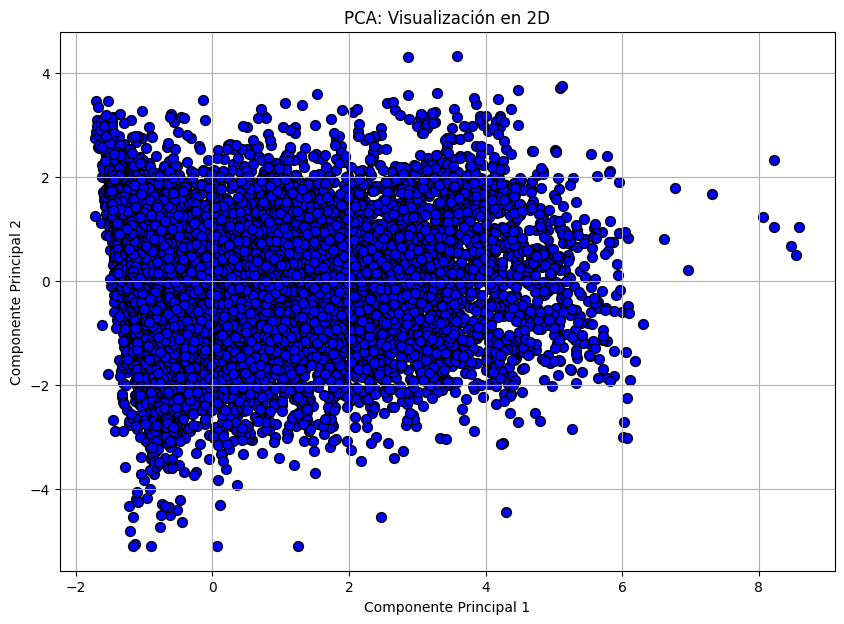

              RADIACION Irradiación normal (MWh/m^2)  Temperature C  \
Componente 1                                0.492545       0.061124   
Componente 2                                0.021037      -0.408674   

              Relative Humidity %   Precipitation Water mm  \
Componente 1             -0.063953               -0.016638   
Componente 2              0.129200               -0.268294   

              Wind Speed (Velocidad del viento)  m/s  \
Componente 1                               -0.031547   
Componente 2                                0.521347   

              Wind Direction (Direccion del Viento) (deg)  \
Componente 1                                    -0.071352   
Componente 2                                     0.369819   

               Termica MWh (unidad 9)  Fotovoltáica\nMWh  Turistas  \
Componente 1                 0.114984            0.31909  0.564914   
Componente 2                -0.511262           -0.16343  0.156095   

              Energia Mwh  
Compone

In [6]:
# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Análisis de Componentes Principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')

# Visualización del PCA
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA: Visualización en 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

# Componentes principales para cada variable
pca_components = pd.DataFrame(pca.components_, columns=variables_disponibles, index=['Componente 1', 'Componente 2'])
print(pca_components)

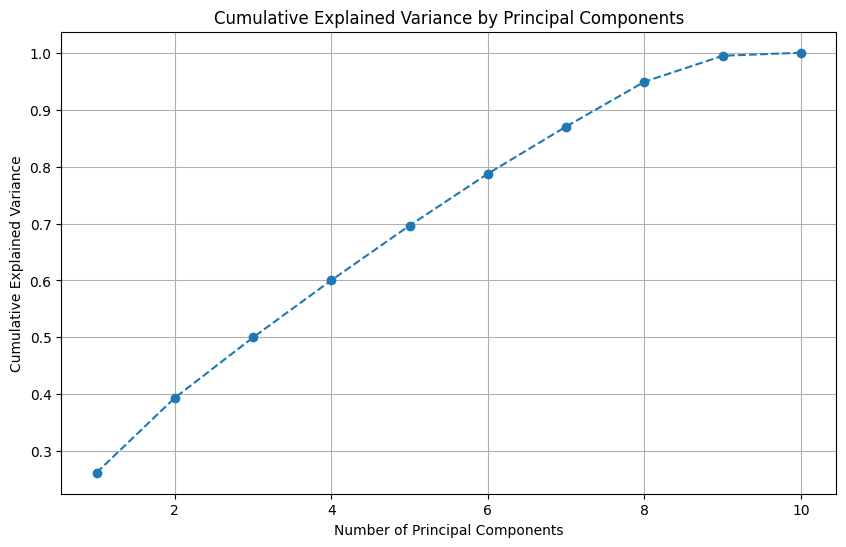

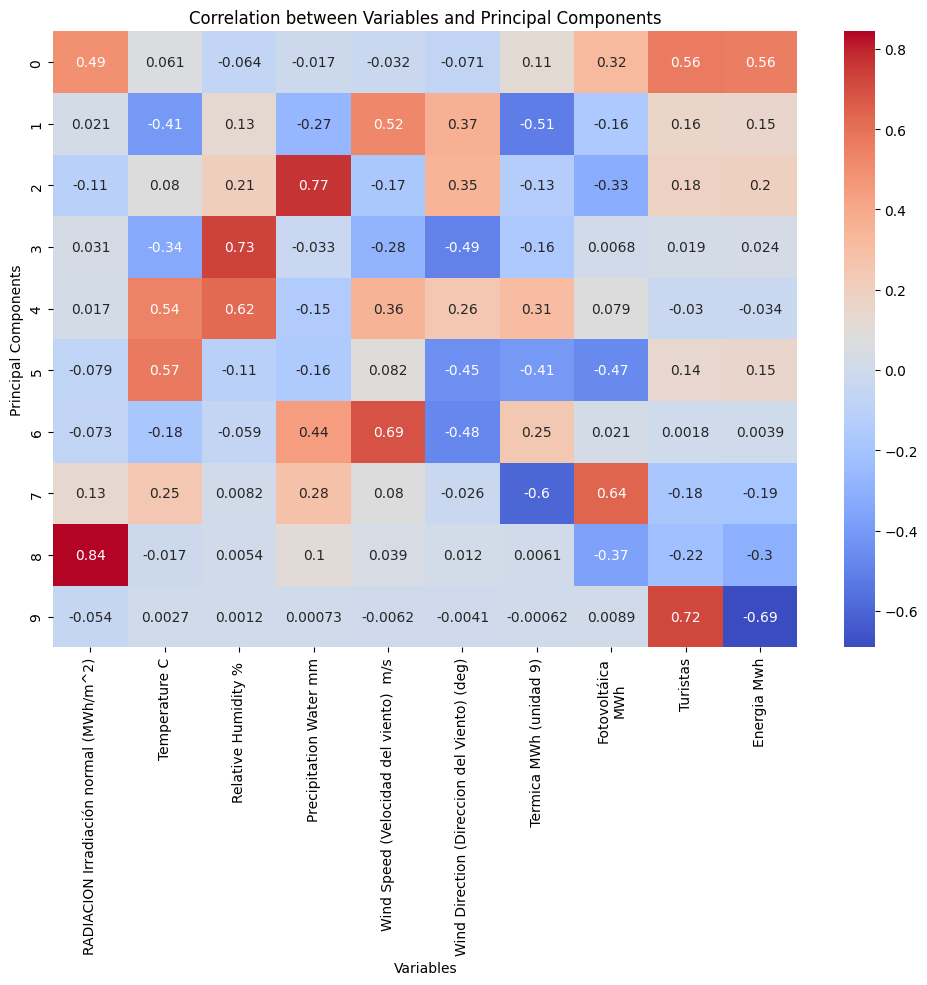

Cargas de las variables en los componentes principales:
               RADIACION Irradiación normal (MWh/m^2)  Temperature C  \
Componente 1                                 0.492545       0.061124   
Componente 2                                 0.021037      -0.408674   
Componente 3                                -0.111453       0.079518   
Componente 4                                 0.030668      -0.335526   
Componente 5                                 0.017028       0.538554   
Componente 6                                -0.078515       0.567674   
Componente 7                                -0.072756      -0.181726   
Componente 8                                 0.133781       0.254451   
Componente 9                                 0.843213      -0.016689   
Componente 10                               -0.054228       0.002698   

               Relative Humidity %   Precipitation Water mm  \
Componente 1              -0.063953               -0.016638   
Componente 2             

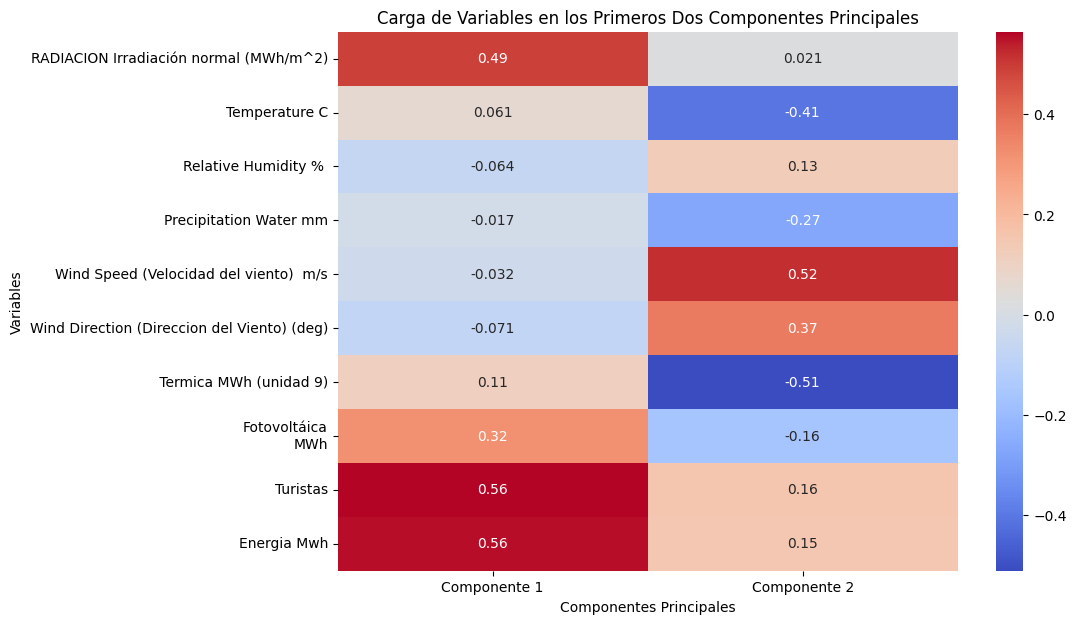

In [8]:
# Lista de variables relevantes (ajustada según los nombres exactos)
variables = [
             'RADIACION Irradiación normal (MWh/m^2)', 'Temperature C', 'Relative Humidity % ', 'Precipitation Water mm', 'Wind Speed (Velocidad del viento)  m/s', 'Wind Direction (Direccion del Viento) (deg)', ' Termica MWh (unidad 9)', 'Fotovoltáica\nMWh', 'Turistas', 'Energia Mwh']

# Filtrar solo las columnas disponibles
variables_disponibles = [col for col in variables if col in df.columns]

# Convertir columnas a numérico (remover comas y convertir a float)
for col in variables_disponibles:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float)

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
X = df[variables_disponibles]

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Análisis de Componentes Principales (PCA)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. Análisis Adicional: Varianza explicada por más componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# 2. Visualización y Correlación: Matriz de correlación entre las variables y los componentes principales
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(pca.components_, columns=variables_disponibles), annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Principal Components')
plt.xlabel('Variables')
plt.ylabel('Principal Components')
plt.show()

# 3. Interpretación de Componentes: Mostrar las cargas de las variables en los primeros componentes principales
cargas_componentes = pd.DataFrame(pca.components_, columns=variables_disponibles,
                                  index=[f'Componente {i+1}' for i in range(len(pca.components_))])

print("Cargas de las variables en los componentes principales:")
print(cargas_componentes)

# 4. Interpretación adicional: Visualización de las cargas de las variables en los dos primeros componentes
plt.figure(figsize=(10, 7))
sns.heatmap(cargas_componentes.iloc[:2].T, annot=True, cmap='coolwarm')
plt.title('Carga de Variables en los Primeros Dos Componentes Principales')
plt.xlabel('Componentes Principales')
plt.ylabel('Variables')
plt.show()



In [9]:
print(df.shape) # Número de filas y columnas
print(df.dtypes) # Tipos de datos de cada columna

(17520, 17)
Fecha                                           object
Dia                                             object
Semana                                           int64
Mes                                              int64
Año                                              int64
Hora                                            object
Clave                                           object
RADIACION Irradiación normal (MWh/m^2)         float64
Temperature C                                  float64
Relative Humidity %                            float64
Precipitation Water mm                         float64
Wind Speed (Velocidad del viento)  m/s         float64
Wind Direction (Direccion del Viento) (deg)    float64
 Termica MWh (unidad 9)                        float64
Fotovoltáica\nMWh                              float64
Turistas                                       float64
Energia Mwh                                    float64
dtype: object


In [10]:
print(df.dtypes)

Fecha                                           object
Dia                                             object
Semana                                           int64
Mes                                              int64
Año                                              int64
Hora                                            object
Clave                                           object
RADIACION Irradiación normal (MWh/m^2)         float64
Temperature C                                  float64
Relative Humidity %                            float64
Precipitation Water mm                         float64
Wind Speed (Velocidad del viento)  m/s         float64
Wind Direction (Direccion del Viento) (deg)    float64
 Termica MWh (unidad 9)                        float64
Fotovoltáica\nMWh                              float64
Turistas                                       float64
Energia Mwh                                    float64
dtype: object


In [11]:
print(df.isnull().sum()) # Contar los valores faltantes por columna
print(df.isnull().values.any()) # Verificar si hay algún valor faltante en todo el DataFrame

Fecha                                          0
Dia                                            0
Semana                                         0
Mes                                            0
Año                                            0
Hora                                           0
Clave                                          0
RADIACION Irradiación normal (MWh/m^2)         0
Temperature C                                  0
Relative Humidity %                            0
Precipitation Water mm                         0
Wind Speed (Velocidad del viento)  m/s         0
Wind Direction (Direccion del Viento) (deg)    0
 Termica MWh (unidad 9)                        0
Fotovoltáica\nMWh                              0
Turistas                                       0
Energia Mwh                                    0
dtype: int64
False


In [12]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Detección de valores atípicos usando IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Columna: {col}")
    print(f"Valores atípicos detectados: {outliers.shape[0]}")
    print(f"Porcentaje de valores atípicos: {100 * outliers.shape[0] / df.shape[0]:.2f}%")
    print("-" * 40)


Columna: Semana
Valores atípicos detectados: 0
Porcentaje de valores atípicos: 0.00%
----------------------------------------
Columna: Mes
Valores atípicos detectados: 0
Porcentaje de valores atípicos: 0.00%
----------------------------------------
Columna: Año
Valores atípicos detectados: 0
Porcentaje de valores atípicos: 0.00%
----------------------------------------
Columna: RADIACION Irradiación normal (MWh/m^2)
Valores atípicos detectados: 73
Porcentaje de valores atípicos: 0.42%
----------------------------------------
Columna: Temperature C
Valores atípicos detectados: 1916
Porcentaje de valores atípicos: 10.94%
----------------------------------------
Columna: Relative Humidity % 
Valores atípicos detectados: 2107
Porcentaje de valores atípicos: 12.03%
----------------------------------------
Columna: Precipitation Water mm
Valores atípicos detectados: 1454
Porcentaje de valores atípicos: 8.30%
----------------------------------------
Columna: Wind Speed (Velocidad del viento) 

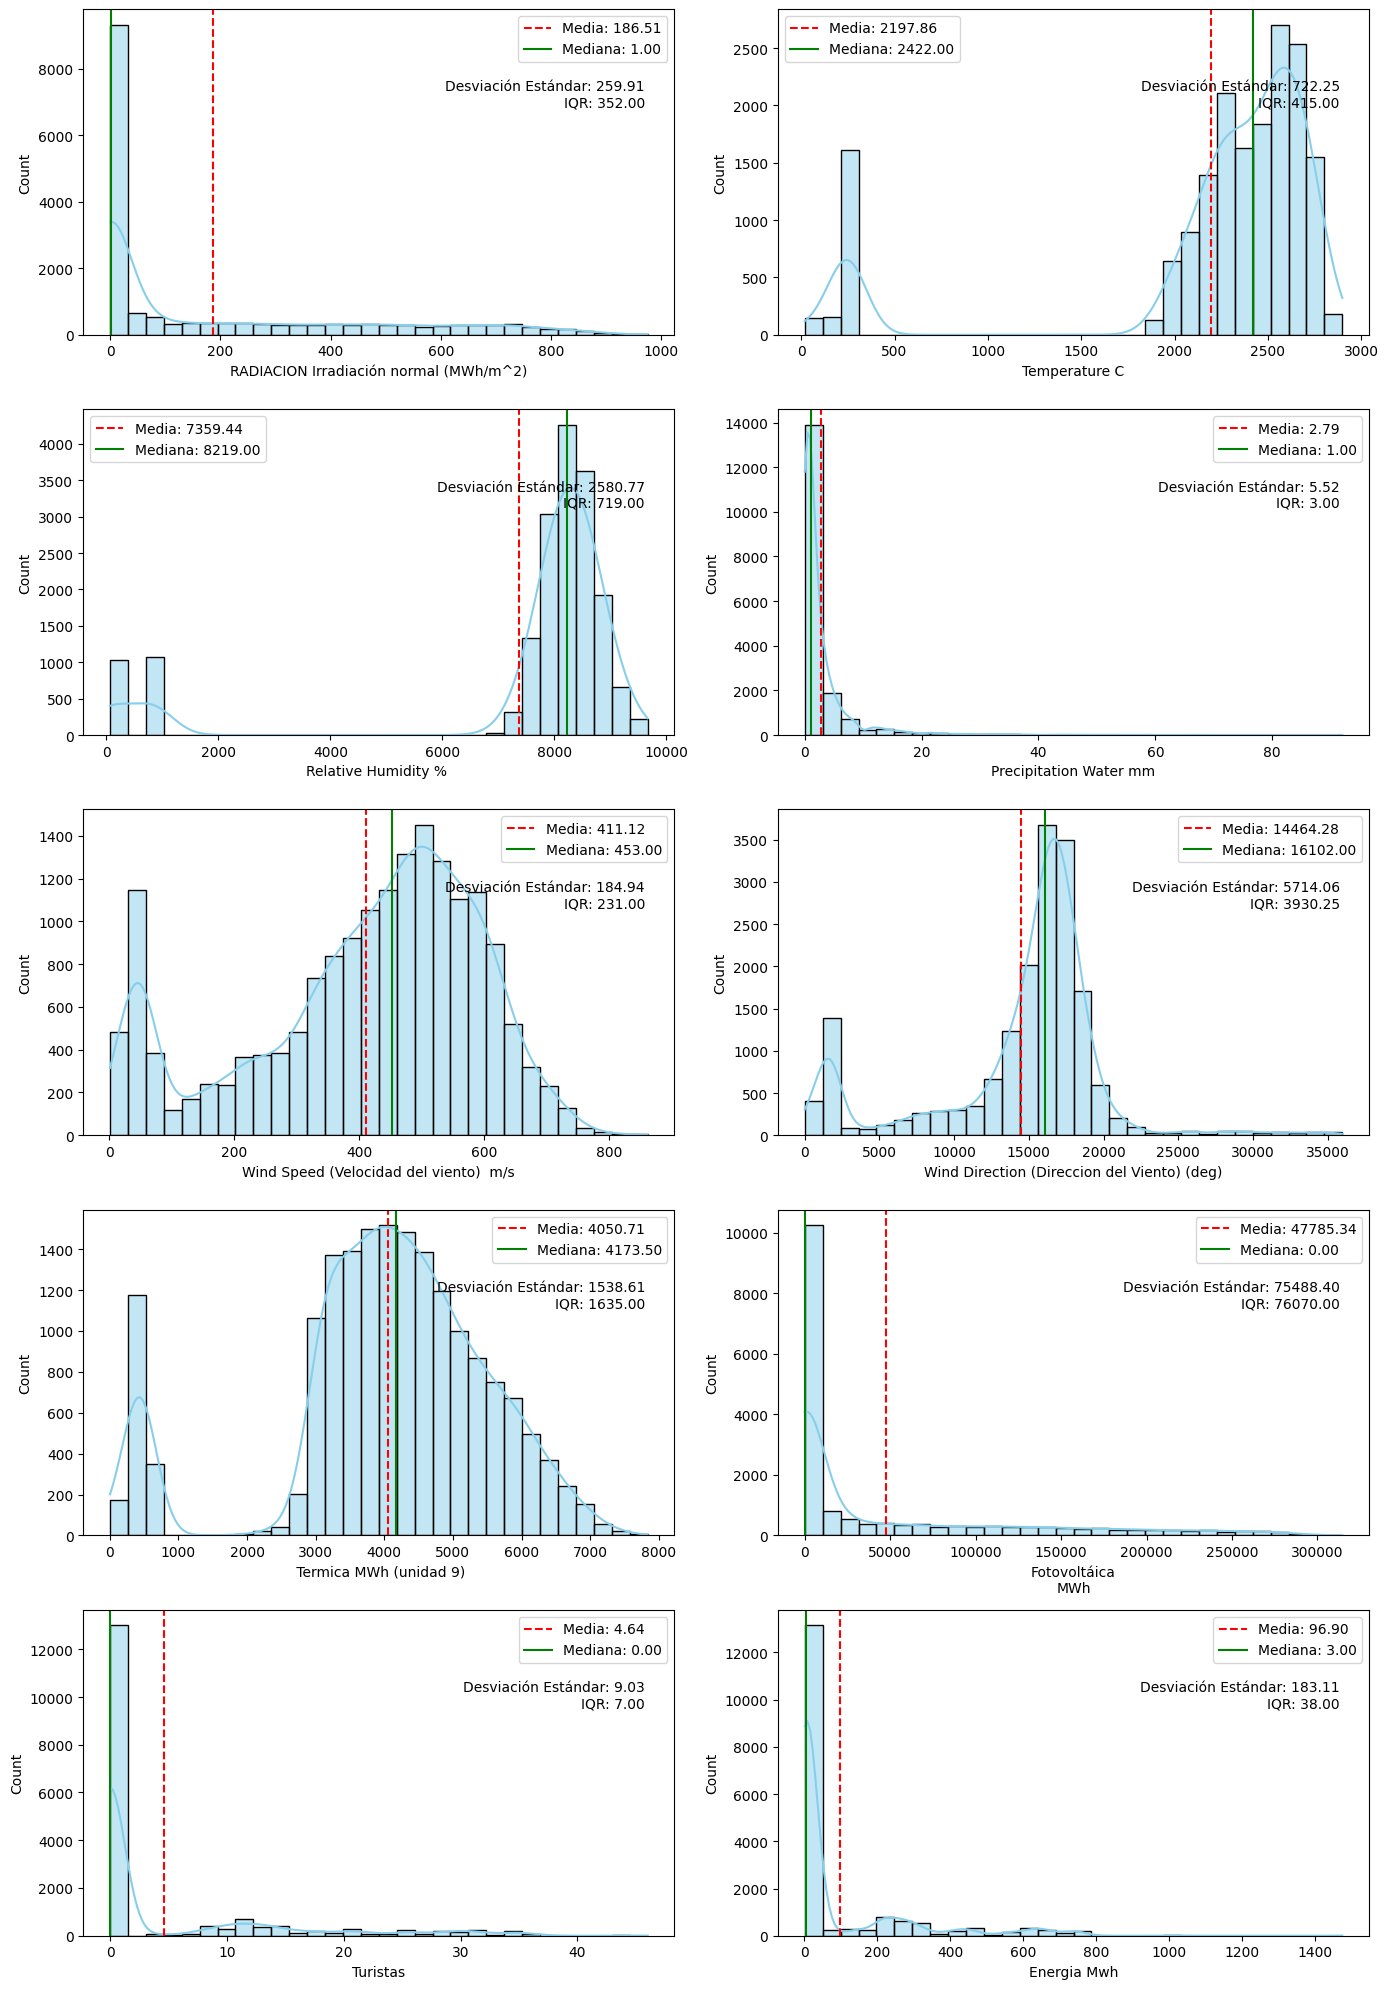

In [13]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Definir las variables más representativas
selected_cols = [
             'RADIACION Irradiación normal (MWh/m^2)', 'Temperature C', 'Relative Humidity % ', 'Precipitation Water mm', 'Wind Speed (Velocidad del viento)  m/s', 'Wind Direction (Direccion del Viento) (deg)', ' Termica MWh (unidad 9)', 'Fotovoltáica\nMWh', 'Turistas', 'Energia Mwh']

# Calcular el número de filas y columnas necesarias para los subplots
n_cols = 2
n_rows = (len(selected_cols) + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

# Crear una figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()  # Aplanar la matriz de ejes para un acceso fácil

# Iterar sobre las columnas seleccionadas para crear histogramas
for i, col in enumerate(selected_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_xlabel(col)

    # Calcular indicadores
    mean = df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)

    # Mostrar indicadores en el gráfico
    axes[i].axvline(mean, color='r', linestyle='--', label=f'Media: {mean:.2f}')
    axes[i].axvline(median, color='g', linestyle='-', label=f'Mediana: {median:.2f}')
    axes[i].legend()

    # Agregar texto de los indicadores
    axes[i].text(0.95, 0.75, f'Desviación Estándar: {std_dev:.2f}', transform=axes[i].transAxes, ha='right')
    axes[i].text(0.95, 0.70, f'IQR: {IQR:.2f}', transform=axes[i].transAxes, ha='right')

# Ajustar el layout
plt.tight_layout()
plt.show()

Matriz de Correlación:
                                             RADIACION Irradiación normal (MWh/m^2)  \
RADIACION Irradiación normal (MWh/m^2)                                     1.000000   
Temperature C                                                              0.047441   
Relative Humidity %                                                       -0.056140   
Precipitation Water mm                                                    -0.070256   
Wind Speed (Velocidad del viento)  m/s                                    -0.032290   
Wind Direction (Direccion del Viento) (deg)                               -0.071255   
 Termica MWh (unidad 9)                                                    0.103587   
Fotovoltáica\nMWh                                                          0.404694   
Turistas                                                                   0.596005   
Energia Mwh                                                                0.553741   

                   

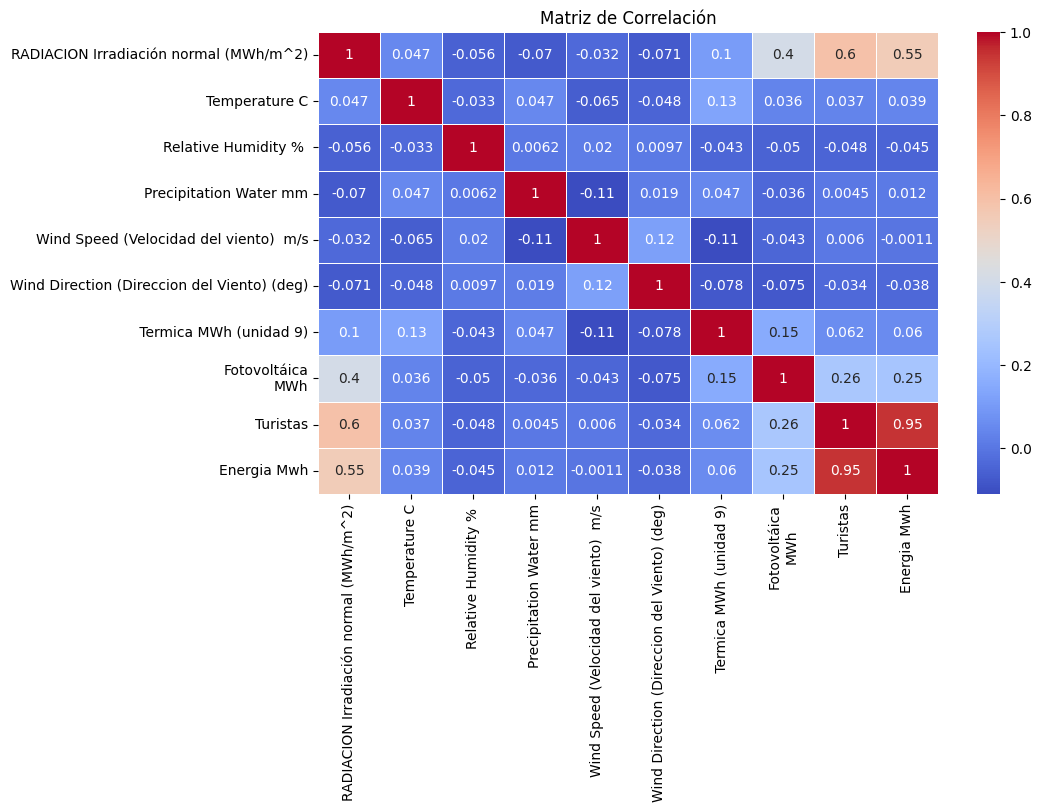

In [14]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Definir las variables más representativas
selected_cols = [
             'RADIACION Irradiación normal (MWh/m^2)', 'Temperature C', 'Relative Humidity % ', 'Precipitation Water mm', 'Wind Speed (Velocidad del viento)  m/s', 'Wind Direction (Direccion del Viento) (deg)', ' Termica MWh (unidad 9)', 'Fotovoltáica\nMWh', 'Turistas', 'Energia Mwh']

# Filtrar el DataFrame para las columnas seleccionadas
df_selected = df[selected_cols]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


MODELACIÓN CON SERIES TEMPORALES

In [ ]:
# Instalación de librerías necesarias
# Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Preprocesamiento y modelado
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
import pandas as pd

# Leer el archivo CSV especificando el delimitador correcto
df_catama = pd.read_csv("Base_final_1.8.csv", encoding='latin1', sep=';')

# Visualizar las primeras filas
df_catama.head(10)


,Fecha,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica\nMWh,Turistas,Energia Mwh
0,1/1/2022 0:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0,"21,83","86,56",0,"5,6","201,95","3,464",0,0,"0,00001"
1,1/1/2022 1:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0,"21,74","86,94",0,"5,42","204,87","3,387",0,0,"0,00001"
2,1/1/2022 2:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0,"21,65","87,56",0,"5,03","204,3","3,263",0,0,"0,00001"
3,1/1/2022 3:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0,"21,58",88,0,"4,75","202,52","3,156",0,0,"0,00019"
4,1/1/2022 4:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0,"21,56","88,31",0,"4,61","200,34","3,058",0,0,"0,00001"
5,1/1/2022 5:00:00,sábado,1,1,2022,5:00:00,sábado/1/1/2022/5,0,"21,54","88,69",0,"4,54","197,22","2,948",0,0,"0,00016"
6,1/1/2022 6:00:00,sábado,1,1,2022,6:00:00,sábado/1/1/2022/6,"0,000119","21,59","88,69",0,"4,58","194,32","2,873",0,0,"0,00016"
7,1/1/2022 7:00:00,sábado,1,1,2022,7:00:00,sábado/1/1/2022/7,"0,000479","21,77","87,69",0,"4,63","192,47","3,017","5,57",0,"0,00016"
8,1/1/2022 8:00:00,sábado,1,1,2022,8:00:00,sábado/1/1/2022/8,"0,000647",22,"86,25",0,"4,69","191,14","3,153","38,536",0,"0,00016"
9,1/1/2022 9:00:00,sábado,1,1,2022,9:00:00,sábado/1/1/2022/9,"0,000724","22,23","85,12",0,"4,59","189,7","3,264","58,663",25,"0,0053"


In [ ]:
#vizualizar el tamaño de la base de datos.
df_catama.shape

(17520, 17)

El conjunto de datos tiene 13,848 filas y 18 columnas. Es un dataset relativamente grande, adecuado para un análisis exploratorio completo.

In [ ]:
#Analisis Exploratorio de datos (conocer la informacion general de la base)
df_catama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Fecha                                        17520 non-null  object
 1   Dia                                          17520 non-null  object
 2   Semana                                       17520 non-null  int64 
 3   Mes                                          17520 non-null  int64 
 4   Año                                          17520 non-null  int64 
 5   Hora                                         17520 non-null  object
 6   Clave                                        17520 non-null  object
 7   RADIACION Irradiación normal (MWh/m^2)       17520 non-null  object
 8   Temperature C                                17520 non-null  object
 9   Relative Humidity %                          17520 non-null  object
 10  Precipitat

In [ ]:
#Devuelve un objeto serie, que muestra la cantidad de valores nulos en cada columna del DataFrame
df_catama.isnull().sum()

,0
Fecha,0
Dia,0
Semana,0
Mes,0
Año,0
Hora,0
Clave,0
RADIACION Irradiación normal (MWh/m^2),0
Temperature C,0
Relative Humidity %,0


No se encontraron valores nulos en ninguna de las columnas. Esto es positivo, ya que no es necesario realizar imputación o eliminación de valores faltantes.

In [ ]:
# Limpiar nombres de columnas: eliminar saltos de línea y espacios adicionales
df_catama.columns = df_catama.columns.str.replace('\n', ' ').str.strip()

# Verificar el resultado
print(df_catama.columns)

Index(['Fecha', 'Dia', 'Semana', 'Mes', 'Año', 'Hora', 'Clave',
       'RADIACION Irradiación normal (MWh/m^2)', 'Temperature C',
       'Relative Humidity %', 'Precipitation Water mm',
       'Wind Speed (Velocidad del viento)  m/s',
       'Wind Direction (Direccion del Viento) (deg)', 'Termica MWh (unidad 9)',
       'Fotovoltáica MWh', 'Turistas', 'Energia Mwh'],
      dtype='object')


In [ ]:
#Convertir en formato Fecha y Hora la columna Fecha
# The format string was changed to '%d/%m/%Y %H:%M' to handle possible missing seconds in your data
# Added the errors='coerce' argument to handle any values that still don't match the format and set them to NaT (Not a Time)
df_catama['Fecha'] = pd.to_datetime(df_catama['Fecha'], format='%d/%m/%Y %H:%M:%S')
df_catama = df_catama.set_index('Fecha') # Capitalized 'Fecha' to match the column name
df_catama = df_catama.asfreq('60min')
df_catama.head()

,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh
Fecha,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0,"21,83","86,56",0,"5,6","201,95","3,464",0,0,"0,00001"
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0,"21,74","86,94",0,"5,42","204,87","3,387",0,0,"0,00001"
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0,"21,65","87,56",0,"5,03","204,3","3,263",0,0,"0,00001"
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0,"21,58",88,0,"4,75","202,52","3,156",0,0,"0,00019"
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0,"21,56","88,31",0,"4,61","200,34","3,058",0,0,"0,00001"


In [ ]:
# Mantener 'Día', 'Semana', 'Mes', 'Año', 'Hora' y 'Clave' como objetos (si aún no lo son)
df_catama['Dia'] = df_catama['Dia'].astype('object')
df_catama['Semana'] = df_catama['Semana'].astype('object')
df_catama['Mes'] = df_catama['Mes'].astype('object')
df_catama['Año'] = df_catama['Año'].astype('object')
df_catama['Hora'] = df_catama['Hora'].astype('object')
df_catama['Clave'] = df_catama['Clave'].astype('object')

# Verificar el resultado
df_catama.info()

# Visualizar las primeras filas con la nueva columna de fecha completa
df_catama.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 00:00:00 to 2023-12-31 23:00:00
Freq: 60T
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Dia                                          17520 non-null  object
 1   Semana                                       17520 non-null  object
 2   Mes                                          17520 non-null  object
 3   Año                                          17520 non-null  object
 4   Hora                                         17520 non-null  object
 5   Clave                                        17520 non-null  object
 6   RADIACION Irradiación normal (MWh/m^2)       17520 non-null  object
 7   Temperature C                                17520 non-null  object
 8   Relative Humidity %                          17520 non-null  object
 9   Precipitation Water mm                

,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh
Fecha,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0,"21,83","86,56",0,"5,6","201,95","3,464",0,0,"0,00001"
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0,"21,74","86,94",0,"5,42","204,87","3,387",0,0,"0,00001"
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0,"21,65","87,56",0,"5,03","204,3","3,263",0,0,"0,00001"
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0,"21,58",88,0,"4,75","202,52","3,156",0,0,"0,00019"
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0,"21,56","88,31",0,"4,61","200,34","3,058",0,0,"0,00001"


In [ ]:
import numpy as np

# Función para limpiar valores numéricos con separadores incorrectos y manejar errores
def limpiar_y_convertir_valor(valor):
    try:
        if isinstance(valor, str):
            # Eliminar todos los puntos excepto el último (si hay más de uno)
            valor = valor.replace('.', '', valor.count('.') - 1)
            # Reemplazar comas por puntos
            valor = valor.replace(',', '.')
        return float(valor)
    except ValueError:
        return np.nan  # Retorna NaN si no se puede convertir a float

# Lista de columnas que deben ser convertidas a float o int (excluyendo las de fecha/hora)
columnas_a_convertir = [
    'RADIACION Irradiación normal (MWh/m^2)',
    'Temperature C',
    'Relative Humidity %',
    'Precipitation Water mm',
    'Wind Speed (Velocidad del viento)  m/s',
    'Wind Direction (Direccion del Viento) (deg)',
    'Termica MWh (unidad 9)',
    'Fotovoltáica MWh',
    'Turistas', 'Energia Mwh'
]

# Aplicar la limpieza y conversión en las columnas numéricas
for columna in columnas_a_convertir:
    df_catama[columna] = df_catama[columna].apply(limpiar_y_convertir_valor)

# Verificar el resultado
df_catama.info()

# Visualizar las primeras filas para confirmar la conversión
df_catama.head(10)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 00:00:00 to 2023-12-31 23:00:00
Freq: 60T
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dia                                          17520 non-null  object 
 1   Semana                                       17520 non-null  object 
 2   Mes                                          17520 non-null  object 
 3   Año                                          17520 non-null  object 
 4   Hora                                         17520 non-null  object 
 5   Clave                                        17520 non-null  object 
 6   RADIACION Irradiación normal (MWh/m^2)       17520 non-null  float64
 7   Temperature C                                17520 non-null  float64
 8   Relative Humidity %                          17520 non-null  float64
 9   Precipitation Water mm     

,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh
Fecha,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0.000000,21.83,86.56,0.0,5.60,201.95,3.464,0.000,0.0,0.00001
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0.000000,21.74,86.94,0.0,5.42,204.87,3.387,0.000,0.0,0.00001
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0.000000,21.65,87.56,0.0,5.03,204.30,3.263,0.000,0.0,0.00001
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0.000000,21.58,88.00,0.0,4.75,202.52,3.156,0.000,0.0,0.00019
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0.000000,21.56,88.31,0.0,4.61,200.34,3.058,0.000,0.0,0.00001
2022-01-01 05:00:00,sábado,1,1,2022,5:00:00,sábado/1/1/2022/5,0.000000,21.54,88.69,0.0,4.54,197.22,2.948,0.000,0.0,0.00016
2022-01-01 06:00:00,sábado,1,1,2022,6:00:00,sábado/1/1/2022/6,0.000119,21.59,88.69,0.0,4.58,194.32,2.873,0.000,0.0,0.00016
2022-01-01 07:00:00,sábado,1,1,2022,7:00:00,sábado/1/1/2022/7,0.000479,21.77,87.69,0.0,4.63,192.47,3.017,5.570,0.0,0.00016
2022-01-01 08:00:00,sábado,1,1,2022,8:00:00,sábado/1/1/2022/8,0.000647,22.00,86.25,0.0,4.69,191.14,3.153,38.536,0.0,0.00016


Varias columnas que inicialmente estaban en formato object fueron convertidas a tipos numéricos (float64 o int64), lo cual es esencial para realizar análisis cuantitativos y visualizaciones precisas.

In [ ]:
# Obtener un resumen estadístico de las columnas numéricas
desc_stats = df_catama.describe()
print(desc_stats)

       RADIACION Irradiación normal (MWh/m^2)  Temperature C  \
count                            17520.000000   17520.000000   
mean                                 0.000205      24.402049   
std                                  0.000267       2.235071   
min                                  0.000000      18.810000   
25%                                  0.000000      22.660000   
50%                                  0.000008      24.820000   
75%                                  0.000397      26.230000   
max                                  0.000975      28.990000   

       Relative Humidity %  Precipitation Water mm  \
count         17520.000000            17520.000000   
mean             82.985752                0.029616   
std               4.495317                0.058189   
min              67.000000                0.000000   
25%              79.940000                0.000000   
50%              82.940000                0.010000   
75%              85.940000                0.0

Valores negativos en la columna de irradiación
La variabilidad en el viento y la temperatura parece moderada, mientras que la humedad permanece bastante constante.
Los valores de energía solar (Fotovoltaica) están muy cercanos a su límite superior, sugiriendo un alto aprovechamiento del recurso cuando está disponible.

In [ ]:
# Valores Atípicos en Todas las Variables
# Seleccionar columnas numéricas
numeric_cols = df_catama.select_dtypes(include=[np.number]).columns

# Calcular y filtrar valores atípicos para cada columna
for col in numeric_cols:
    Q1 = df_catama[col].quantile(0.25)
    Q3 = df_catama[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_catama[(df_catama[col] < lower_bound) | (df_catama[col] > upper_bound)]

    if not outliers.empty:
        print(f"Valores atípicos en {col}:")
        print(outliers[col].describe())
        print()


Valores atípicos en Relative Humidity %:
count    111.000000
mean      89.031802
std       11.168323
min       67.000000
25%       82.940000
50%       95.190000
75%       95.530000
max       96.620000
Name: Relative Humidity %, dtype: float64

Valores atípicos en Precipitation Water mm:
count    1677.000000
mean        0.164383
std         0.111980
min         0.080000
25%         0.090000
50%         0.130000
75%         0.190000
max         0.920000
Name: Precipitation Water mm, dtype: float64

Valores atípicos en Wind Speed (Velocidad del viento)  m/s:
count    186.000000
mean       0.639839
std        0.852170
min        0.060000
25%        0.422500
50%        0.600000
75%        0.710000
max        8.620000
Name: Wind Speed (Velocidad del viento)  m/s, dtype: float64

Valores atípicos en Wind Direction (Direccion del Viento) (deg):
count    1808.000000
mean      130.102456
std        99.515715
min         0.000000
25%        68.267500
50%        87.145000
75%       224.020000
max 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


# Especifica las columnas que deseas normalizar
columnas_a_convertir = [    'RADIACION Irradiación normal (MWh/m^2)',
    'Temperature C',
    'Relative Humidity %',
    'Precipitation Water mm',
    'Wind Speed (Velocidad del viento)  m/s',
    'Wind Direction (Direccion del Viento) (deg)',
    'Termica MWh (unidad 9)',
    'Fotovoltáica MWh',
    'Turistas', 'Energia Mwh']

# Reemplazar valores atípicos de -999 por NaN
df_catama.replace(-999.0, np.nan, inplace=True)

# Imputar valores faltantes utilizando la mediana
imputer = SimpleImputer(strategy='median')
df_catama[columnas_a_convertir] = imputer.fit_transform(df_catama[columnas_a_convertir])

# Normalizar las columnas seleccionadas utilizando el escalado Min-Max en el rango [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
df_catama[columnas_a_convertir] = scaler.fit_transform(df_catama[columnas_a_convertir])

# Visualizar los primeros registros para verificar la normalización
df_catama.head(-5)


,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh
Fecha,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0.000000,0.296660,0.660365,0.000000,0.647196,0.561268,0.437049,0.000000,0.000000,0.000000
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0.000000,0.287819,0.673194,0.000000,0.626168,0.569384,0.427137,0.000000,0.000000,0.000000
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0.000000,0.278978,0.694126,0.000000,0.580607,0.567800,0.411174,0.000000,0.000000,0.000000
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0.000000,0.272102,0.708980,0.000000,0.547897,0.562853,0.397400,0.000000,0.000000,0.012212
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0.000000,0.270138,0.719446,0.000000,0.531542,0.556794,0.384784,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:00:00,domingo,31,12,2023,14:00:00,domingo/31/12/2023/14,0.560000,0.704322,0.525321,0.043478,0.619159,0.411273,0.718718,0.522534,0.652174,0.430801
2023-12-31 15:00:00,domingo,31,12,2023,15:00:00,domingo/31/12/2023/15,0.391795,0.701375,0.536124,0.043478,0.617991,0.413024,0.753605,0.585507,0.000000,0.000000
2023-12-31 16:00:00,domingo,31,12,2023,16:00:00,domingo/31/12/2023/16,0.212308,0.698428,0.548616,0.043478,0.609813,0.415997,0.791066,0.563965,0.000000,0.000000


In [ ]:
df_catama.info()
df_catama.head(-5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 00:00:00 to 2023-12-31 23:00:00
Freq: 60T
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dia                                          17520 non-null  object 
 1   Semana                                       17520 non-null  object 
 2   Mes                                          17520 non-null  object 
 3   Año                                          17520 non-null  object 
 4   Hora                                         17520 non-null  object 
 5   Clave                                        17520 non-null  object 
 6   RADIACION Irradiación normal (MWh/m^2)       17520 non-null  float64
 7   Temperature C                                17520 non-null  float64
 8   Relative Humidity %                          17520 non-null  float64
 9   Precipitation Water mm     

,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh
Fecha,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0.000000,0.296660,0.660365,0.000000,0.647196,0.561268,0.437049,0.000000,0.000000,0.000000
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0.000000,0.287819,0.673194,0.000000,0.626168,0.569384,0.427137,0.000000,0.000000,0.000000
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0.000000,0.278978,0.694126,0.000000,0.580607,0.567800,0.411174,0.000000,0.000000,0.000000
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0.000000,0.272102,0.708980,0.000000,0.547897,0.562853,0.397400,0.000000,0.000000,0.012212
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0.000000,0.270138,0.719446,0.000000,0.531542,0.556794,0.384784,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:00:00,domingo,31,12,2023,14:00:00,domingo/31/12/2023/14,0.560000,0.704322,0.525321,0.043478,0.619159,0.411273,0.718718,0.522534,0.652174,0.430801
2023-12-31 15:00:00,domingo,31,12,2023,15:00:00,domingo/31/12/2023/15,0.391795,0.701375,0.536124,0.043478,0.617991,0.413024,0.753605,0.585507,0.000000,0.000000
2023-12-31 16:00:00,domingo,31,12,2023,16:00:00,domingo/31/12/2023/16,0.212308,0.698428,0.548616,0.043478,0.609813,0.415997,0.791066,0.563965,0.000000,0.000000


Matriz de correlación redondeada:
[[ 1.    0.18 -0.36 -0.08 -0.06 -0.12  0.17  0.45  0.63  0.63]
 [ 0.18  1.   -0.47  0.19 -0.35 -0.19  0.74  0.15  0.13  0.13]
 [-0.36 -0.47  1.    0.09  0.18  0.08 -0.45 -0.32 -0.24 -0.23]
 [-0.08  0.19  0.09  1.   -0.17  0.02  0.07 -0.04  0.    0.  ]
 [-0.06 -0.35  0.18 -0.17  1.    0.27 -0.23 -0.07  0.   -0.01]
 [-0.12 -0.19  0.08  0.02  0.27  1.   -0.18 -0.12 -0.05 -0.05]
 [ 0.17  0.74 -0.45  0.07 -0.23 -0.18  1.    0.25  0.09  0.08]
 [ 0.45  0.15 -0.32 -0.04 -0.07 -0.12  0.25  1.    0.27  0.27]
 [ 0.63  0.13 -0.24  0.    0.   -0.05  0.09  0.27  1.    0.99]
 [ 0.63  0.13 -0.23  0.   -0.01 -0.05  0.08  0.27  0.99  1.  ]]


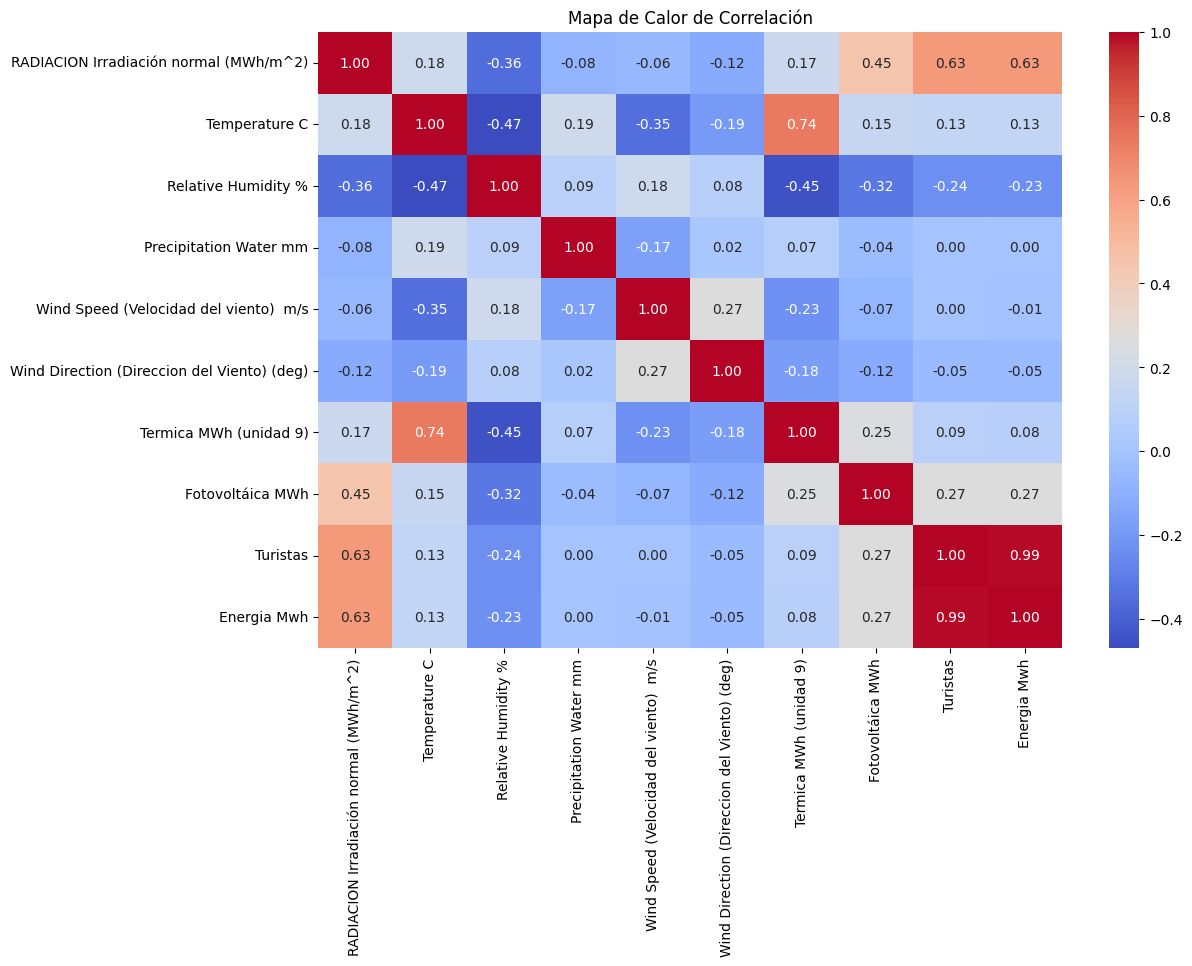

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
df_numeric = df_catama.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Redondear a dos decimales
correlation_matrix_rounded = correlation_matrix.round(2)

# Mostrar la matriz numérica de correlación redondeada
print("Matriz de correlación redondeada:")
print(correlation_matrix_rounded.values)  # Mostrar solo los valores de la matriz

# Crear la figura para el mapa de calor
plt.figure(figsize=(12, 8))

# Generar el mapa de calor
sns.heatmap(correlation_matrix_rounded, annot=True, cmap='coolwarm', fmt='.2f')

# Añadir título
plt.title('Mapa de Calor de Correlación')

# Mostrar la gráfica
plt.show()


MODELO ARIMA SERIES TEMPORALES

El test estadístico que se emplea para verificar la estacionaridad de una serie temporal es el test Augmented Dickey-Fuller.

Las hipótesis de este test son:

H₀ (Hipótesis nula) = La serie temporal no es estacionaria

H₁ (Hipótesis alternativa) = La serie temporal es estacionaria

Debemos definir un nivel de significancia a, que generalmete tiene un valor de 0.05. Esto se usa para compararlo con el valor p (p-value) del test. Por un lado, si el p valor del test es mayor que el nivel de significancia, fallaríamos en rechazar la hipótesis nula, lo que significa que serie temporal no seríá estacionaria. Por otro lado, si el p valor es menor que le nivel de significancia, rechazaremos la hipótesis nula, lo que significa que nuestra serie temporal se puede considerar estacionaria.

Para elegir d haremos ese test en los datos de la serie temporal. Si podemos concluir que es estacionaria entonce d valdrá 0. Si no lo es, necesitaremos aplicar una transformación de diferenciación y volver a realizar el test. Si tras una diferenciación nuestra serie temporal se vuelve estacionaria, d valdrá 1. Este proceso se repetirá tantas veces como sea necesarias hasta definir d.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Uno de los primeros análisis que hay que realizar al trabajar con series temporales es verificar si la serie está completa.

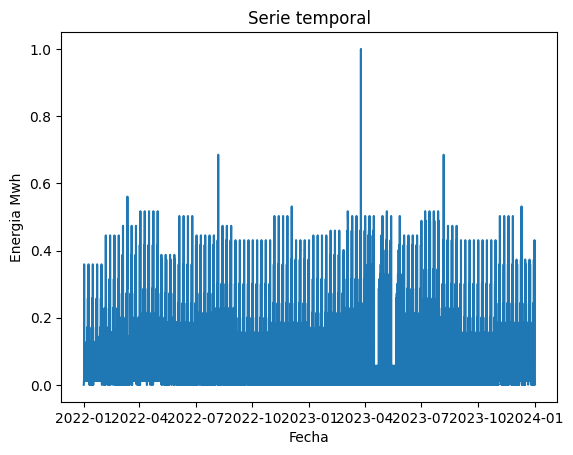

In [ ]:

# Now plot a specific column, for example 'Energia Mwh'
plt.plot(df_catama['Energia Mwh'])
plt.title( 'Serie temporal' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Energia Mwh' )
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_catama[ 'Energia Mwh' ])
# Generar los resultados
print ( 'Estadística ADF: %f' % adf_test[ 0 ])
print ( 'p-value: %f' % adf_test[ 1 ])

Estadística ADF: -18.146339
p-value: 0.000000


Un valor p inferior a 0,05 indica estacionariedad, y nuestros datos cumplen este criterio, por lo que no necesitamos diferenciarlos.

Cómo estimamos p y q?
Necesitamos comprobar cómo de correlada esta la serie temporal con versiones lagged (retrasadas) de sí misma.

A la serie temporal original se refiere como 0. Una versión retrasada 1 paso temporal se refiere como 1, y así todas. La correlación con la serie temporal original con retraso de 0 (sin retraso), siempre valdrá 1 ya que son la misma serie temporal.

Necesitamos diferenciar dos correlaciones:

La correlación indirecta que los pasos temporales t-1, t-2, t-3… tienen sobre el paso temporal t simplemente por ser adyacentes los unos a los otros. Por ejemplo, con valores de acciones, el precio de hoy vendrá influenciado por el precio que tuvo ayer y, por lo tanto, el precio de ayer tiene relación con el precio que tuvo anteayer.
La correlación directa que cada uno de los pasos temporales anteriores tiene con el paso temporal t. Continuando con el mismo ejemplo, imagina que cada tres días hay un evento especial, es de esperar que veremos una correlación directa con la serie temporal retrasada 3 pasos.
Para medir estos efectos podemos usar los gráficos ACF y PACF:

ACF Función de autocorrelación (AutoCorrelation Function) muestra la correlación entre pasos temporales. Incluye los efectos directos e indirectos
PACF Función parcial de autocorrelación (Partial AutoCorrelation Function) muestra sólo la correlación directa

**Verificar** **Estacionariedad**

Prueba de Estacionariedad (Prueba de Dickey-Fuller Aumentada):
Aplica la prueba de Dickey-Fuller para verificar si la serie es estacionaria.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'Energia Mwh' is a numerical column representing your time series data
resultado_adf = adfuller(df_catama['Energia Mwh'].dropna())
print(f'Estadística ADF: {resultado_adf[0]}')
print(f'p-value: {resultado_adf[1]}')

Estadística ADF: -18.14633875020802
p-value: 2.4828619069975995e-30


Interpretación: Si el p-value es menor a 0.05, la serie es estacionaria y
𝑑
=
0
d=0. Si es mayor, necesitas diferenciar la serie (aplica .diff() en la serie y repite la prueba hasta que el p-value sea menor a 0.05).

In [ ]:
serie_temporal_diff =df_catama['Energia Mwh'].diff().dropna()


**Identificación de los parámetros (p, d, q)**

Gráfico de Autocorrelación (ACF): Mide la correlación entre la serie y sus retardos (lags). Es útil para identificar
𝑞
q (el componente MA).

Gráfico de Autocorrelación Parcial (PACF): Muestra la correlación entre la serie y sus retardos, eliminando la influencia de los lags intermedios. Es útil para identificar
𝑝
p (el componente AR).

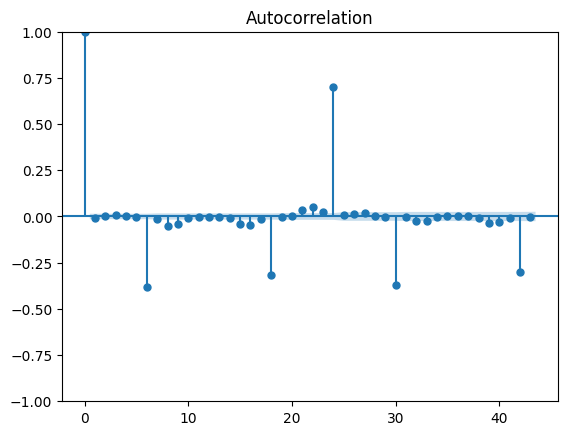

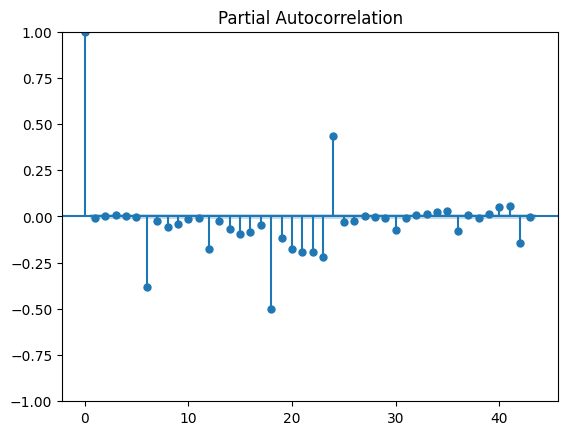

In [ ]:
plot_acf(serie_temporal_diff)
plt.show()

plot_pacf(serie_temporal_diff)
plt.show()


In [ ]:
# 4. División de los datos en entrenamiento y prueba
train_size = int(len(df_catama['Energia Mwh']) * 0.8)
train, test = df_catama['Energia Mwh'][:train_size], df_catama['Energia Mwh'][train_size:]

In [ ]:
# 5. Construcción y entrenamiento del modelo ARIMA
p = 1  # Número de retardos (AR)
d = 0  # Número de diferenciaciones (I)
q = 1  # Número de términos de media móvil (MA)

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Energia Mwh   No. Observations:                14016
Model:                 ARIMA(1, 0, 1)   Log Likelihood               16130.180
Date:                Wed, 25 Sep 2024   AIC                         -32252.359
Time:                        19:15:29   BIC                         -32222.168
Sample:                    01-01-2022   HQIC                        -32242.309
                         - 08-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0730      0.005     13.789      0.000       0.063       0.083
ar.L1          0.7738      0.008     96.151      0.000       0.758       0.790
ma.L1          0.0994      0.021      4.681      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

modelo = ARIMA(test, order=(1, 0, 1))
model_fit = modelo.fit() # Use 'modelo' instead of 'model'
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Energia Mwh   No. Observations:                 3504
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4332.688
Date:                Wed, 25 Sep 2024   AIC                          -8657.376
Time:                        19:15:49   BIC                          -8632.729
Sample:                    08-08-2023   HQIC                         -8648.580
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0639      0.010      6.374      0.000       0.044       0.084
ar.L1          0.7641      0.018     42.698      0.000       0.729       0.799
ma.L1          0.0979      0.042      2.322      0.0

In [ ]:
!pip install statsmodels
from statsmodels.stats.stattools import durbin_watson # Importar la función DW
dw = durbin_watson(model_fit.resid) # Use 'model_fit' instead of 'results'
print('Durbin-Watson:', dw)

Durbin-Watson: 1.9825700197724927


Descripciones:

Model: Especifica el tipo de modelo ajustado, en este caso será algo como ARIMA(p, d, q).

Date & Time: Fecha y hora en la que se ejecutó el ajuste del modelo.

No. Observations: Número total de observaciones utilizadas en el ajuste del modelo.

Log Likelihood: El logaritmo de la función de verosimilitud. Valores más altos indican un mejor ajuste del modelo, pero este valor se utiliza más comúnmente en comparación con otros modelos.

2. Model Coefficients
Esta sección lista los coeficientes estimados para cada componente del modelo ARIMA, junto con estadísticas relevantes.

Coef: Los valores de los coeficientes estimados para los términos AR (AutoRegresivo), MA (Media Móvil) y la constante (intercepto, si está presente).


Usualmente, se comparan diferentes modelos ARIMA (con distintos valores de
𝑝
p,
𝑑
d,
𝑞
q) usando AIC, BIC o HQIC. El modelo con el menor valor de estos criterios suele ser preferido.
4. Diagnostics (Diagnóstico del Modelo)
Ljung-Box Q (Q-Statistic): Prueba si los residuos son independientes. Un p-valor alto (mayor a 0.05) sugiere que los residuos son ruido blanco, lo que indica un buen ajuste del modelo.
Jarque-Bera: Prueba de normalidad de los residuos. Un p-valor bajo (menor a 0.05) indica que los residuos no siguen una distribución normal.
Heteroskedasticity (H): Prueba para ver si la varianza de los residuos es constante. Un valor cercano a 1 sugiere homocedasticidad (varianza constante).
Durbin-Watson: Estadístico que mide la autocorrelación en los residuos. Un valor cercano a 2 sugiere que no hay autocorrelación en los residuos.


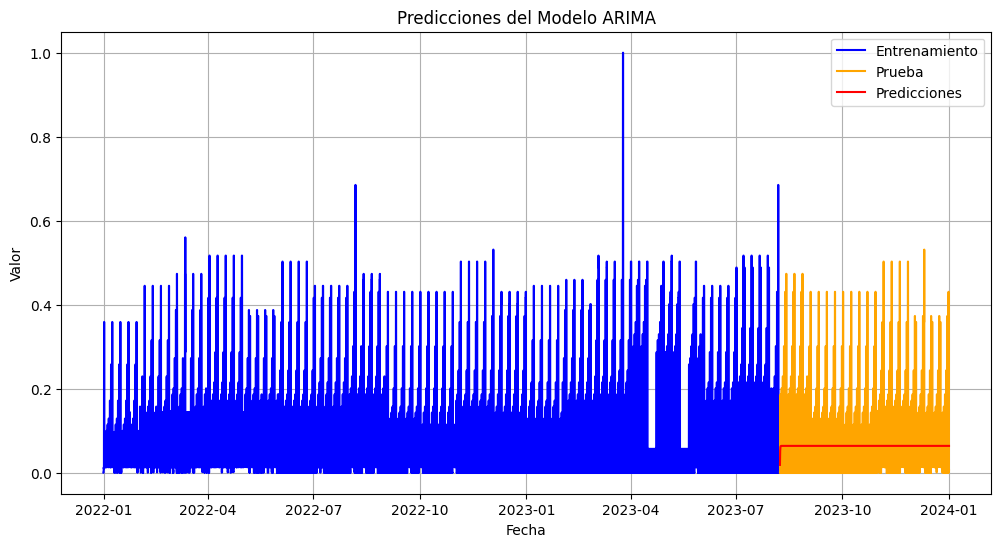

In [ ]:
# 6. Evaluación del modelo
# Predicción en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar los datos de entrenamiento
plt.plot(train.index, train, label='Entrenamiento', color='blue')

# Graficar los datos de prueba
plt.plot(test.index, test, label='Prueba', color='orange')

# Graficar las predicciones
plt.plot(test.index, predictions, label='Predicciones', color='red')

# Añadir título y etiquetas
plt.title('Predicciones del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

In [ ]:
# Verificar si hay NaN o valores infinitos
print(np.isnan(predictions).any(), np.isnan(test).any())
print(np.isinf(predictions).any(), np.isinf(test).any())

# Verificar las formas de los arreglos
print(predictions.shape, test.shape)

# Asegúrate de que ambos arreglos son del mismo tipo y contienen números
print(predictions.dtype, test.dtype)

False False
False False
(3504,) (3504,)
float64 float64


In [ ]:
print(predictions)
print(test)


2024-01-01 00:00:00    0.018527
2024-01-01 01:00:00    0.029233
2024-01-01 02:00:00    0.037414
2024-01-01 03:00:00    0.043664
2024-01-01 04:00:00    0.048440
                         ...   
2024-05-25 19:00:00    0.063907
2024-05-25 20:00:00    0.063907
2024-05-25 21:00:00    0.063907
2024-05-25 22:00:00    0.063907
2024-05-25 23:00:00    0.063907
Freq: 60T, Name: predicted_mean, Length: 3504, dtype: float64
Fecha
2023-08-08 00:00:00    0.000678
2023-08-08 01:00:00    0.000678
2023-08-08 02:00:00    0.001357
2023-08-08 03:00:00    0.000678
2023-08-08 04:00:00    0.000678
                         ...   
2023-12-31 19:00:00    0.006106
2023-12-31 20:00:00    0.006106
2023-12-31 21:00:00    0.006106
2023-12-31 22:00:00    0.006106
2023-12-31 23:00:00    0.006106
Freq: 60T, Name: Energia Mwh, Length: 3504, dtype: float64


In [ ]:
print(np.isnan(predictions).any(), np.isnan(test).any())
print(np.isinf(predictions).any(), np.isinf(test).any())

False False
False False


In [ ]:
import numpy as np

def calculate_rmse(predictions, test):
    # Verificar si hay NaN o inf
    if np.isnan(predictions).any() or np.isnan(test).any():
        raise ValueError("Los arreglos no deben contener NaN.")
    if np.isinf(predictions).any() or np.isinf(test).any():
        raise ValueError("Los arreglos no deben contener inf.")

    # Verificar dimensiones
    if predictions.shape != test.shape:
        raise ValueError("Las dimensiones de predictions y test deben ser iguales.")

    # Calcular RMSE
    rmse = np.sqrt(np.mean((predictions - test) ** 2))
    return rmse

In [ ]:
rmse = calculate_rmse(predictions, test)
print(f'RMSE: {rmse}')

RMSE: nan


In [ ]:
print("Predictions:", predictions)
print("Test:", test)

Predictions: 2024-01-01 00:00:00    0.018527
2024-01-01 01:00:00    0.029233
2024-01-01 02:00:00    0.037414
2024-01-01 03:00:00    0.043664
2024-01-01 04:00:00    0.048440
                         ...   
2024-05-25 19:00:00    0.063907
2024-05-25 20:00:00    0.063907
2024-05-25 21:00:00    0.063907
2024-05-25 22:00:00    0.063907
2024-05-25 23:00:00    0.063907
Freq: 60T, Name: predicted_mean, Length: 3504, dtype: float64
Test: Fecha
2023-08-08 00:00:00    0.000678
2023-08-08 01:00:00    0.000678
2023-08-08 02:00:00    0.001357
2023-08-08 03:00:00    0.000678
2023-08-08 04:00:00    0.000678
                         ...   
2023-12-31 19:00:00    0.006106
2023-12-31 20:00:00    0.006106
2023-12-31 21:00:00    0.006106
2023-12-31 22:00:00    0.006106
2023-12-31 23:00:00    0.006106
Freq: 60T, Name: Energia Mwh, Length: 3504, dtype: float64


In [ ]:
# Calcular el error de la predicción
rmse = np.sqrt(np.mean((predictions - test) ** 2))
print(f'RMSE: {rmse}')

RMSE: nan


In [ ]:
# 7. Predicción futura
forecast = model_fit.forecast(steps=100)
print('Predicciones futuras:', forecast)

Predicciones futuras: 2024-01-01 00:00:00    0.018527
2024-01-01 01:00:00    0.029233
2024-01-01 02:00:00    0.037414
2024-01-01 03:00:00    0.043664
2024-01-01 04:00:00    0.048440
                         ...   
2024-01-04 23:00:00    0.063907
2024-01-05 00:00:00    0.063907
2024-01-05 01:00:00    0.063907
2024-01-05 02:00:00    0.063907
2024-01-05 03:00:00    0.063907
Freq: 60T, Name: predicted_mean, Length: 100, dtype: float64


MODELO SARIMA con variable exógena

In [ ]:
# Instalación de librerías necesarias
# Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Preprocesamiento y modelado
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
import pandas as pd

# Leer el archivo CSV especificando el delimitador correcto
df_catama = pd.read_csv("Base_final_1.8.csv", encoding='latin1', sep=';')

# Visualizar las primeras filas
df_catama.head(10)

,Fecha,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica\nMWh,Turistas,Energia Mwh
0,1/1/2022 0:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0,"21,83","86,56",0,"5,6","201,95","3,464",0,0,"0,00001"
1,1/1/2022 1:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0,"21,74","86,94",0,"5,42","204,87","3,387",0,0,"0,00001"
2,1/1/2022 2:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0,"21,65","87,56",0,"5,03","204,3","3,263",0,0,"0,00001"
3,1/1/2022 3:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0,"21,58",88,0,"4,75","202,52","3,156",0,0,"0,00019"
4,1/1/2022 4:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0,"21,56","88,31",0,"4,61","200,34","3,058",0,0,"0,00001"
5,1/1/2022 5:00:00,sábado,1,1,2022,5:00:00,sábado/1/1/2022/5,0,"21,54","88,69",0,"4,54","197,22","2,948",0,0,"0,00016"
6,1/1/2022 6:00:00,sábado,1,1,2022,6:00:00,sábado/1/1/2022/6,"0,000119","21,59","88,69",0,"4,58","194,32","2,873",0,0,"0,00016"
7,1/1/2022 7:00:00,sábado,1,1,2022,7:00:00,sábado/1/1/2022/7,"0,000479","21,77","87,69",0,"4,63","192,47","3,017","5,57",0,"0,00016"
8,1/1/2022 8:00:00,sábado,1,1,2022,8:00:00,sábado/1/1/2022/8,"0,000647",22,"86,25",0,"4,69","191,14","3,153","38,536",0,"0,00016"
9,1/1/2022 9:00:00,sábado,1,1,2022,9:00:00,sábado/1/1/2022/9,"0,000724","22,23","85,12",0,"4,59","189,7","3,264","58,663",25,"0,0053"


In [ ]:
#Devuelve un objeto serie, que muestra la cantidad de valores nulos en cada columna del DataFrame
df_catama.isnull().sum()

,0
Fecha,0
Dia,0
Semana,0
Mes,0
Año,0
Hora,0
Clave,0
RADIACION Irradiación normal (MWh/m^2),0
Temperature C,0
Relative Humidity %,0


In [ ]:
# Limpiar nombres de columnas: eliminar saltos de línea y espacios adicionales
df_catama.columns = df_catama.columns.str.replace('\n', ' ').str.strip()

# Verificar el resultado
print(df_catama.columns)

Index(['Fecha', 'Dia', 'Semana', 'Mes', 'Año', 'Hora', 'Clave',
       'RADIACION Irradiación normal (MWh/m^2)', 'Temperature C',
       'Relative Humidity %', 'Precipitation Water mm',
       'Wind Speed (Velocidad del viento)  m/s',
       'Wind Direction (Direccion del Viento) (deg)', 'Termica MWh (unidad 9)',
       'Fotovoltáica MWh', 'Turistas', 'Energia Mwh'],
      dtype='object')


In [ ]:
#Convertir en formato Fecha y Hora la columna Fecha
df_catama['Fecha'] = pd.to_datetime(df_catama['Fecha'], format='%d/%m/%Y %H:%M:%S') # Changed the format string to match the actual date format
df_catama = df_catama.set_index('Fecha') # Capitalized 'Fecha' to match the column name
df_catama = df_catama.asfreq('60min')
df_catama.head()

,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh
Fecha,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0,"21,83","86,56",0,"5,6","201,95","3,464",0,0,"0,00001"
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0,"21,74","86,94",0,"5,42","204,87","3,387",0,0,"0,00001"
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0,"21,65","87,56",0,"5,03","204,3","3,263",0,0,"0,00001"
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0,"21,58",88,0,"4,75","202,52","3,156",0,0,"0,00019"
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0,"21,56","88,31",0,"4,61","200,34","3,058",0,0,"0,00001"


In [ ]:
# Mantener 'Día', 'Semana', 'Mes', 'Año', 'Hora' y 'Clave' como objetos (si aún no lo son)
df_catama['Dia'] = df_catama['Dia'].astype('object')
df_catama['Semana'] = df_catama['Semana'].astype('object')
df_catama['Mes'] = df_catama['Mes'].astype('object')
df_catama['Año'] = df_catama['Año'].astype('object')
df_catama['Hora'] = df_catama['Hora'].astype('object')
df_catama['Clave'] = df_catama['Clave'].astype('object')

# Verificar el resultado
df_catama.info()

# Visualizar las primeras filas con la nueva columna de fecha completa
df_catama.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 00:00:00 to 2023-12-31 23:00:00
Freq: 60T
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Dia                                          17520 non-null  object
 1   Semana                                       17520 non-null  object
 2   Mes                                          17520 non-null  object
 3   Año                                          17520 non-null  object
 4   Hora                                         17520 non-null  object
 5   Clave                                        17520 non-null  object
 6   RADIACION Irradiación normal (MWh/m^2)       17520 non-null  object
 7   Temperature C                                17520 non-null  object
 8   Relative Humidity %                          17520 non-null  object
 9   Precipitation Water mm                

,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh
Fecha,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0,"21,83","86,56",0,"5,6","201,95","3,464",0,0,"0,00001"
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0,"21,74","86,94",0,"5,42","204,87","3,387",0,0,"0,00001"
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0,"21,65","87,56",0,"5,03","204,3","3,263",0,0,"0,00001"
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0,"21,58",88,0,"4,75","202,52","3,156",0,0,"0,00019"
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0,"21,56","88,31",0,"4,61","200,34","3,058",0,0,"0,00001"


In [ ]:
import numpy as np

# Función para limpiar valores numéricos con separadores incorrectos y manejar errores
def limpiar_y_convertir_valor(valor):
    try:
        if isinstance(valor, str):
            # Eliminar todos los puntos excepto el último (si hay más de uno)
            valor = valor.replace('.', '', valor.count('.') - 1)
            # Reemplazar comas por puntos
            valor = valor.replace(',', '.')
        return float(valor)
    except ValueError:
        return np.nan  # Retorna NaN si no se puede convertir a float

# Lista de columnas que deben ser convertidas a float o int (excluyendo las de fecha/hora)
columnas_a_convertir = [
    'RADIACION Irradiación normal (MWh/m^2)',
    'Temperature C',
    'Relative Humidity %',
    'Precipitation Water mm',
    'Wind Speed (Velocidad del viento)  m/s',
    'Wind Direction (Direccion del Viento) (deg)',
    'Termica MWh (unidad 9)',
    'Fotovoltáica MWh',
    'Turistas', 'Energia Mwh'
]

# Aplicar la limpieza y conversión en las columnas numéricas
for columna in columnas_a_convertir:
    df_catama[columna] = df_catama[columna].apply(limpiar_y_convertir_valor)

# Verificar el resultado
df_catama.info()

# Visualizar las primeras filas para confirmar la conversión
df_catama.head(10)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 00:00:00 to 2023-12-31 23:00:00
Freq: 60T
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dia                                          17520 non-null  object 
 1   Semana                                       17520 non-null  object 
 2   Mes                                          17520 non-null  object 
 3   Año                                          17520 non-null  object 
 4   Hora                                         17520 non-null  object 
 5   Clave                                        17520 non-null  object 
 6   RADIACION Irradiación normal (MWh/m^2)       17520 non-null  float64
 7   Temperature C                                17520 non-null  float64
 8   Relative Humidity %                          17520 non-null  float64
 9   Precipitation Water mm     

,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh
Fecha,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0.000000,21.83,86.56,0.0,5.60,201.95,3.464,0.000,0.0,0.00001
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0.000000,21.74,86.94,0.0,5.42,204.87,3.387,0.000,0.0,0.00001
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0.000000,21.65,87.56,0.0,5.03,204.30,3.263,0.000,0.0,0.00001
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0.000000,21.58,88.00,0.0,4.75,202.52,3.156,0.000,0.0,0.00019
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0.000000,21.56,88.31,0.0,4.61,200.34,3.058,0.000,0.0,0.00001
2022-01-01 05:00:00,sábado,1,1,2022,5:00:00,sábado/1/1/2022/5,0.000000,21.54,88.69,0.0,4.54,197.22,2.948,0.000,0.0,0.00016
2022-01-01 06:00:00,sábado,1,1,2022,6:00:00,sábado/1/1/2022/6,0.000119,21.59,88.69,0.0,4.58,194.32,2.873,0.000,0.0,0.00016
2022-01-01 07:00:00,sábado,1,1,2022,7:00:00,sábado/1/1/2022/7,0.000479,21.77,87.69,0.0,4.63,192.47,3.017,5.570,0.0,0.00016
2022-01-01 08:00:00,sábado,1,1,2022,8:00:00,sábado/1/1/2022/8,0.000647,22.00,86.25,0.0,4.69,191.14,3.153,38.536,0.0,0.00016


In [ ]:
# Valores Atípicos en Todas las Variables
# Seleccionar columnas numéricas
numeric_cols = df_catama.select_dtypes(include=[np.number]).columns

# Calcular y filtrar valores atípicos para cada columna
for col in numeric_cols:
    Q1 = df_catama[col].quantile(0.25)
    Q3 = df_catama[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_catama[(df_catama[col] < lower_bound) | (df_catama[col] > upper_bound)]

    if not outliers.empty:
        print(f"Valores atípicos en {col}:")
        print(outliers[col].describe())
        print()


Valores atípicos en Relative Humidity %:
count    111.000000
mean      89.031802
std       11.168323
min       67.000000
25%       82.940000
50%       95.190000
75%       95.530000
max       96.620000
Name: Relative Humidity %, dtype: float64

Valores atípicos en Precipitation Water mm:
count    1677.000000
mean        0.164383
std         0.111980
min         0.080000
25%         0.090000
50%         0.130000
75%         0.190000
max         0.920000
Name: Precipitation Water mm, dtype: float64

Valores atípicos en Wind Speed (Velocidad del viento)  m/s:
count    186.000000
mean       0.639839
std        0.852170
min        0.060000
25%        0.422500
50%        0.600000
75%        0.710000
max        8.620000
Name: Wind Speed (Velocidad del viento)  m/s, dtype: float64

Valores atípicos en Wind Direction (Direccion del Viento) (deg):
count    1808.000000
mean      130.102456
std        99.515715
min         0.000000
25%        68.267500
50%        87.145000
75%       224.020000
max 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


# Especifica las columnas que deseas normalizar
columnas_a_convertir = [    'RADIACION Irradiación normal (MWh/m^2)',
    'Temperature C',
    'Relative Humidity %',
    'Precipitation Water mm',
    'Wind Speed (Velocidad del viento)  m/s',
    'Wind Direction (Direccion del Viento) (deg)',
    'Termica MWh (unidad 9)',
    'Fotovoltáica MWh',
    'Turistas','Energia Mwh']

# Reemplazar valores atípicos de -999 por NaN
df_catama.replace(-999.0, np.nan, inplace=True)

# Imputar valores faltantes utilizando la mediana
imputer = SimpleImputer(strategy='median')
df_catama[columnas_a_convertir] = imputer.fit_transform(df_catama[columnas_a_convertir])

# Normalizar las columnas seleccionadas utilizando el escalado Min-Max en el rango [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
df_catama[columnas_a_convertir] = scaler.fit_transform(df_catama[columnas_a_convertir])

# Visualizar los primeros registros para verificar la normalización
df_catama.head(-5)


,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh
Fecha,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,sábado,1,1,2022,0:00:00,sábado/1/1/2022/0,0.000000,0.296660,0.660365,0.000000,0.647196,0.561268,0.437049,0.000000,0.000000,0.000000
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0.000000,0.287819,0.673194,0.000000,0.626168,0.569384,0.427137,0.000000,0.000000,0.000000
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0.000000,0.278978,0.694126,0.000000,0.580607,0.567800,0.411174,0.000000,0.000000,0.000000
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0.000000,0.272102,0.708980,0.000000,0.547897,0.562853,0.397400,0.000000,0.000000,0.012212
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0.000000,0.270138,0.719446,0.000000,0.531542,0.556794,0.384784,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:00:00,domingo,31,12,2023,14:00:00,domingo/31/12/2023/14,0.560000,0.704322,0.525321,0.043478,0.619159,0.411273,0.718718,0.522534,0.652174,0.430801
2023-12-31 15:00:00,domingo,31,12,2023,15:00:00,domingo/31/12/2023/15,0.391795,0.701375,0.536124,0.043478,0.617991,0.413024,0.753605,0.585507,0.000000,0.000000
2023-12-31 16:00:00,domingo,31,12,2023,16:00:00,domingo/31/12/2023/16,0.212308,0.698428,0.548616,0.043478,0.609813,0.415997,0.791066,0.563965,0.000000,0.000000


In [ ]:
import pandas as pd
import numpy as np


# Reemplazar ceros en la columna 'Energia Mwh' con un valor pequeño para evitar divisiones por cero
aumento = 1e-10  # Puedes ajustar este valor según sea necesario
df_catama['Energia Mwh'] = df_catama['Energia Mwh'].replace(0, aumento)
print(df_catama)


                         Dia Semana Mes   Año      Hora  \
Fecha                                                     
2022-01-01 00:00:00   sábado      1   1  2022   0:00:00   
2022-01-01 01:00:00   sábado      1   1  2022   1:00:00   
2022-01-01 02:00:00   sábado      1   1  2022   2:00:00   
2022-01-01 03:00:00   sábado      1   1  2022   3:00:00   
2022-01-01 04:00:00   sábado      1   1  2022   4:00:00   
...                      ...    ...  ..   ...       ...   
2023-12-31 19:00:00  domingo     31  12  2023  19:00:00   
2023-12-31 20:00:00  domingo     31  12  2023  20:00:00   
2023-12-31 21:00:00  domingo     31  12  2023  21:00:00   
2023-12-31 22:00:00  domingo     31  12  2023  22:00:00   
2023-12-31 23:00:00  domingo     31  12  2023  23:00:00   

                                     Clave  \
Fecha                                        
2022-01-01 00:00:00      sábado/1/1/2022/0   
2022-01-01 01:00:00      sábado/1/1/2022/1   
2022-01-01 02:00:00      sábado/1/1/2022/2   
20

1. Preparación de Datos


Datos de Precios/Rendimientos: Necesitas una serie temporal de precios o rendimientos. Los rendimientos se calculan típicamente como las diferencias logarítmicas entre precios consecutivos.
Variable Fecha: Asegúrate de que tus datos de precios/rendimientos estén asociados con una columna de fechas correctamente formateada.

In [ ]:
# Calcular el rendimiento
df_catama['Rendimiento'] = np.log(df_catama['Energia Mwh'] / df_catama['Energia Mwh'].shift(1))

# Eliminar valores NaN generados por el cálculo de rendimientos
df_catama = df_catama.dropna()

print(df_catama)

                         Dia Semana Mes   Año      Hora  \
Fecha                                                     
2022-01-01 01:00:00   sábado      1   1  2022   1:00:00   
2022-01-01 02:00:00   sábado      1   1  2022   2:00:00   
2022-01-01 03:00:00   sábado      1   1  2022   3:00:00   
2022-01-01 04:00:00   sábado      1   1  2022   4:00:00   
2022-01-01 05:00:00   sábado      1   1  2022   5:00:00   
...                      ...    ...  ..   ...       ...   
2023-12-31 19:00:00  domingo     31  12  2023  19:00:00   
2023-12-31 20:00:00  domingo     31  12  2023  20:00:00   
2023-12-31 21:00:00  domingo     31  12  2023  21:00:00   
2023-12-31 22:00:00  domingo     31  12  2023  22:00:00   
2023-12-31 23:00:00  domingo     31  12  2023  23:00:00   

                                     Clave  \
Fecha                                        
2022-01-01 01:00:00      sábado/1/1/2022/1   
2022-01-01 02:00:00      sábado/1/1/2022/2   
2022-01-01 03:00:00      sábado/1/1/2022/3   
20

Ajuste del Modelo GARCH

In [ ]:
!pip install arch

from arch import arch_model

# Ajustar el modelo GARCH(1, 1)
model = arch_model(df_catama['Rendimiento'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Extraer la volatilidad condicional estimada
df_catama['volatilidad'] = garch_fit.conditional_volatility
print(df_catama)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 98160.70014691187
Iteration:      2,   Func. Count:     14,   Neg. LLF: 906354.3813670968
Iteration:      3,   Func. Count:     21,   Neg. LLF: 62654.75215914643
Iteration:      4,   Func. Count:     27,   Neg. LLF: 626665.5170494652
Iteration:      5,   Func. Count:     35,   Neg. LLF: 60564.78944197579
Iteration:      6,   Func. Count:     41,   Neg. LLF: 62053.6744396271
Iteration:      7,   Func. Count:     47,   Neg. LLF: 80704.2753287635
Iteration:      8,   Func. Count:     55,   Neg. LLF: 90767.3886798394
Iteration:      9,   Func. Count:     63,   Neg. LLF: 61974.674689593885
Iteration:     10,   Func. Count:     69,   Neg. LLF: 58658.76493691423
Iteration:     11,   Func. Count:     75,   Neg. LLF: 61355.72290575685
Iteration:     12,   Func. Count:     81,   Neg. LLF: 58706.54233174283
Iteration:     13,   Func. Count:     87,   Neg. LLF: 57301.81419135633
Iteration:     14,   Func. Count:     92,   Neg. LLF: 57271.436400

In [ ]:
# Especifica las columnas que deseas normalizar
columnas_a_convertir = ['volatilidad']

# Reemplazar valores atípicos de -999 por NaN
df_catama.replace(-999.0, np.nan, inplace=True)

# Imputar valores faltantes utilizando la mediana
imputer = SimpleImputer(strategy='median')
df_catama[columnas_a_convertir] = imputer.fit_transform(df_catama[columnas_a_convertir])

# Normalizar las columnas seleccionadas utilizando el escalado Min-Max en el rango [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
df_catama[columnas_a_convertir] = scaler.fit_transform(df_catama[columnas_a_convertir])

# Visualizar los primeros registros para verificar la normalización
df_catama.head(-5)

,Dia,Semana,Mes,Año,Hora,Clave,RADIACION Irradiación normal (MWh/m^2),Temperature C,Relative Humidity %,Precipitation Water mm,Wind Speed (Velocidad del viento) m/s,Wind Direction (Direccion del Viento) (deg),Termica MWh (unidad 9),Fotovoltáica MWh,Turistas,Energia Mwh,Rendimiento,volatilidad
Fecha,,,,,,,,,,,,,,,,,,
2022-01-01 01:00:00,sábado,1,1,2022,1:00:00,sábado/1/1/2022/1,0.000000,0.287819,0.673194,0.000000,0.626168,0.569384,0.427137,0.000000,0.000000,1.000000e-10,0.000000,0.410505
2022-01-01 02:00:00,sábado,1,1,2022,2:00:00,sábado/1/1/2022/2,0.000000,0.278978,0.694126,0.000000,0.580607,0.567800,0.411174,0.000000,0.000000,1.000000e-10,0.000000,0.386724
2022-01-01 03:00:00,sábado,1,1,2022,3:00:00,sábado/1/1/2022/3,0.000000,0.272102,0.708980,0.000000,0.547897,0.562853,0.397400,0.000000,0.000000,1.221167e-02,18.620488,0.364101
2022-01-01 04:00:00,sábado,1,1,2022,4:00:00,sábado/1/1/2022/4,0.000000,0.270138,0.719446,0.000000,0.531542,0.556794,0.384784,0.000000,0.000000,1.000000e-10,-18.620488,0.506244
2022-01-01 05:00:00,sábado,1,1,2022,5:00:00,sábado/1/1/2022/5,0.000000,0.268173,0.732275,0.000000,0.523364,0.548123,0.370623,0.000000,0.000000,1.017639e-02,18.438166,0.611261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:00:00,domingo,31,12,2023,14:00:00,domingo/31/12/2023/14,0.560000,0.704322,0.525321,0.043478,0.619159,0.411273,0.718718,0.522534,0.652174,4.308005e-01,0.033630,0.547561
2023-12-31 15:00:00,domingo,31,12,2023,15:00:00,domingo/31/12/2023/15,0.391795,0.701375,0.536124,0.043478,0.617991,0.413024,0.753605,0.585507,0.000000,1.000000e-10,-22.183741,0.517236
2023-12-31 16:00:00,domingo,31,12,2023,16:00:00,domingo/31/12/2023/16,0.212308,0.698428,0.548616,0.043478,0.609813,0.415997,0.791066,0.563965,0.000000,1.000000e-10,0.000000,0.669342


In [ ]:
# Define the proportion of data for training (e.g., 80%)
train_size = int(len(df_catama) * 0.8)

train_energia = df_catama['Energia Mwh'][:train_size]
test_energia = df_catama['Energia Mwh'][train_size:]

train_volatilidad = df_catama['volatilidad'][:train_size]
test_volatilidad = df_catama['volatilidad'][train_size:]

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Supongamos que tienes una serie temporal de interés llamada 'serie_objetivo'
# Define the order of the SARIMA model (p, d, q) and seasonal order (P, D, Q, S)
p = 1
d = 0
q = 1
P = 1
D = 0
Q = 1
S =12


# Ensure both variables have the same length for the training set
min_length = min(len(train_energia), len(train_volatilidad))
train_energia = train_energia[:min_length]
train_volatilidad = train_volatilidad[:min_length]

# Verificar las longitudes después del corte
print("Longitud de train_energia:", len(train_energia))
print("Longitud de train_volatilidad:", len(train_volatilidad))

# Convert train_volatilidad to the correct format for exog
train_volatilidad = train_volatilidad.values.reshape(-1, 1)  # Reshape to a 2D array

# Ajustar el modelo SARIMA
model = sm.tsa.SARIMAX(train_energia, exog=train_volatilidad, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_fit = model.fit()
print(sarima_fit.summary())


Longitud de train_energia: 14015
Longitud de train_volatilidad: 14015


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                        Energia Mwh   No. Observations:                14015
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               18834.311
Date:                            Wed, 25 Sep 2024   AIC                         -37656.623
Time:                                    19:33:49   BIC                         -37611.336
Sample:                                01-01-2022   HQIC                        -37641.547
                                     - 08-07-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1144      0.006     19.934      0.000       0.103       0.126
ar.L1          0.7647      0.006   

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Supongamos que tienes una serie temporal de interés llamada 'serie_objetivo'
# Define the order of the SARIMA model (p, d, q) and seasonal order (P, D, Q, S)
p = 1
d = 0
q = 1
P = 1
D = 0
Q = 1
S =12


# Ensure both variables have the same length for the training set
min_length = min(len(test_energia), len(test_volatilidad))
test_energia = test_energia[:min_length]
test_volatilidad = test_volatilidad[:min_length]

# Verificar las longitudes después del corte
print("Longitud de train_energia:", len(test_energia))
print("Longitud de train_volatilidad:", len(test_volatilidad))

# Convert train_volatilidad to the correct format for exog
test_volatilidad = test_volatilidad.values.reshape(-1, 1)  # Reshape to a 2D array

# Ajustar el modelo SARIMA
model = sm.tsa.SARIMAX(test_energia, exog=test_volatilidad, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_fit = model.fit()
print(sarima_fit.summary())

Longitud de train_energia: 3504
Longitud de train_volatilidad: 3504


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                        Energia Mwh   No. Observations:                 3504
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                5098.729
Date:                            Wed, 25 Sep 2024   AIC                         -10185.458
Time:                                    19:36:15   BIC                         -10148.489
Sample:                                08-08-2023   HQIC                        -10172.265
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0924      0.009     10.039      0.000       0.074       0.110
ar.L1          0.7554      0.014   

Matriz de correlación redondeada:
[[ 1.    0.18 -0.36 -0.08 -0.06 -0.12  0.17  0.45  0.63  0.63 -0.    0.  ]
 [ 0.18  1.   -0.47  0.19 -0.35 -0.19  0.74  0.15  0.13  0.13 -0.01 -0.02]
 [-0.36 -0.47  1.    0.09  0.18  0.08 -0.45 -0.32 -0.24 -0.23  0.03 -0.15]
 [-0.08  0.19  0.09  1.   -0.17  0.02  0.07 -0.04  0.    0.    0.01 -0.04]
 [-0.06 -0.35  0.18 -0.17  1.    0.27 -0.23 -0.07  0.   -0.01  0.01  0.15]
 [-0.12 -0.19  0.08  0.02  0.27  1.   -0.18 -0.12 -0.05 -0.05  0.01  0.12]
 [ 0.17  0.74 -0.45  0.07 -0.23 -0.18  1.    0.25  0.09  0.08 -0.05  0.07]
 [ 0.45  0.15 -0.32 -0.04 -0.07 -0.12  0.25  1.    0.27  0.27 -0.09  0.  ]
 [ 0.63  0.13 -0.24  0.    0.   -0.05  0.09  0.27  1.    0.99  0.11  0.03]
 [ 0.63  0.13 -0.23  0.   -0.01 -0.05  0.08  0.27  0.99  1.    0.12 -0.01]
 [-0.   -0.01  0.03  0.01  0.01  0.01 -0.05 -0.09  0.11  0.12  1.    0.02]
 [ 0.   -0.02 -0.15 -0.04  0.15  0.12  0.07  0.    0.03 -0.01  0.02  1.  ]]


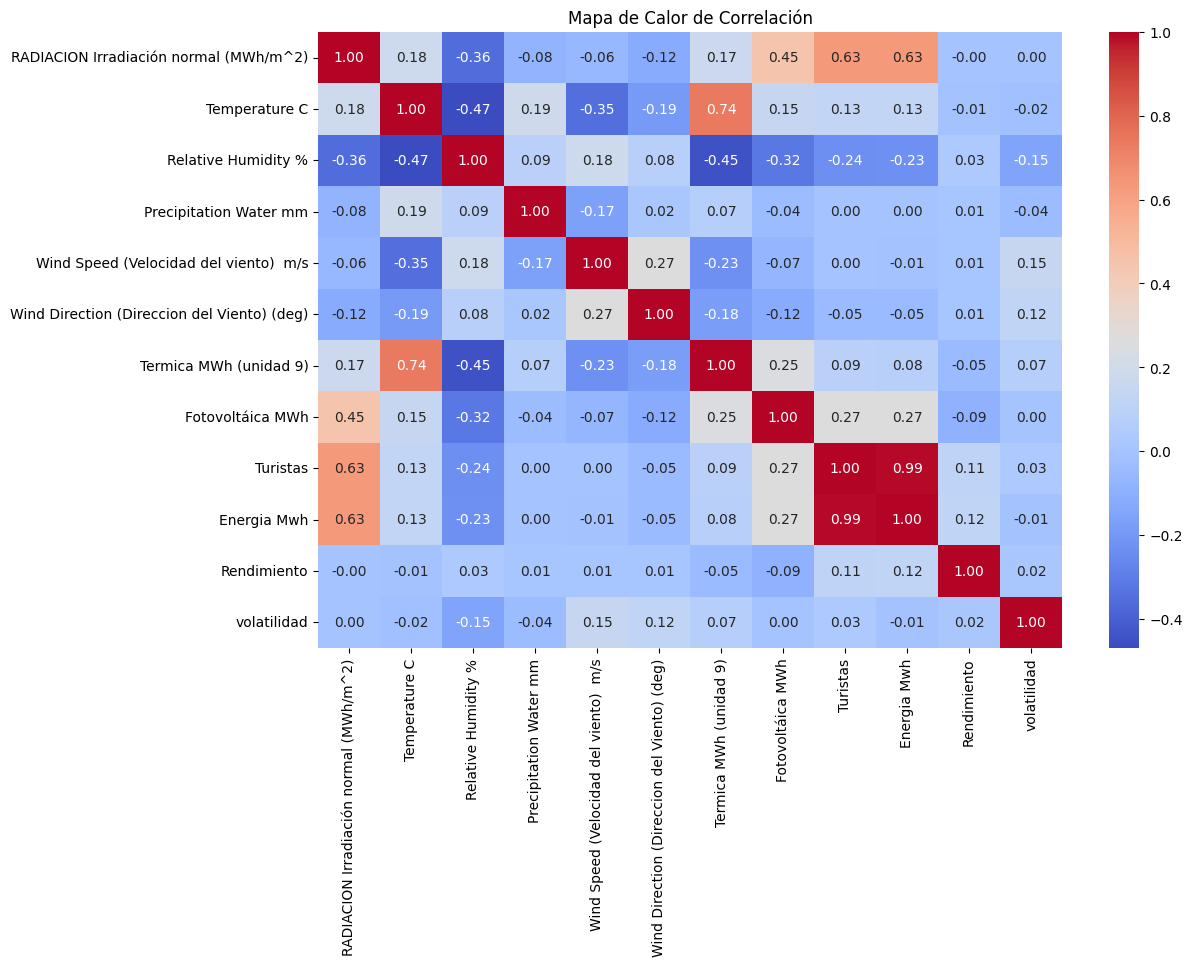

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
df_numeric = df_catama.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Redondear a dos decimales
correlation_matrix_rounded = correlation_matrix.round(2)

# Mostrar la matriz numérica de correlación redondeada
print("Matriz de correlación redondeada:")
print(correlation_matrix_rounded.values)  # Mostrar solo los valores de la matriz

# Crear la figura para el mapa de calor
plt.figure(figsize=(12, 8))

# Generar el mapa de calor
sns.heatmap(correlation_matrix_rounded, annot=True, cmap='coolwarm', fmt='.2f')

# Añadir título
plt.title('Mapa de Calor de Correlación')

# Mostrar la gráfica
plt.show()


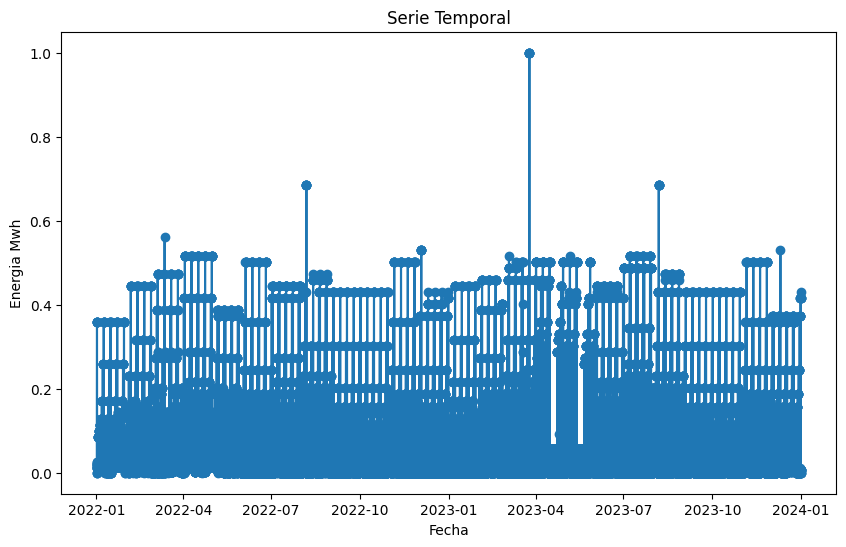

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_catama.index, df_catama['Energia Mwh'], marker='o', linestyle='-')
plt.title('Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Energia Mwh')
plt.show()

Paso 2: Identificar el Periodo Estacional Determina el periodo estacional s. Puedes observar patrones estacionales en el gráfico o usar análisis de autocorrelación.

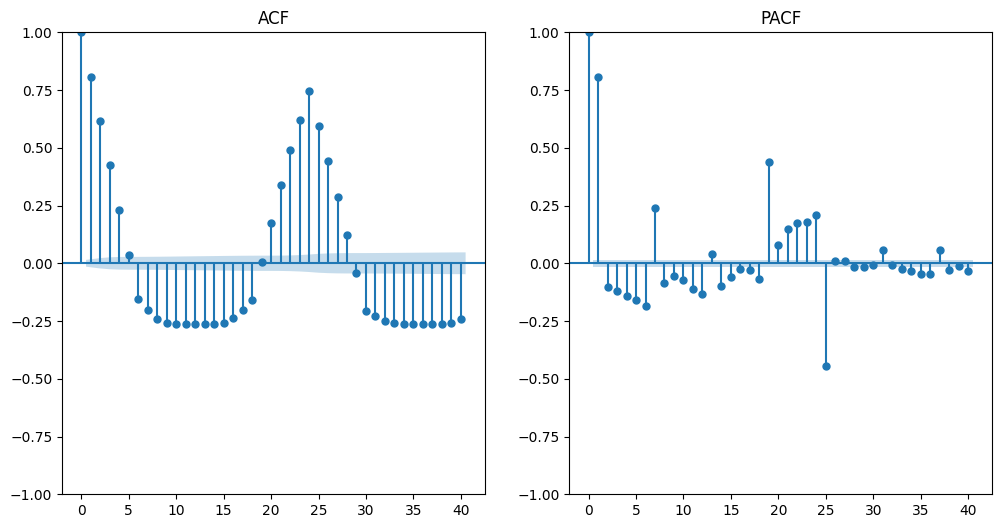

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df_catama['Energia Mwh'], lags=40, ax=plt.gca())
plt.title('ACF')

plt.subplot(1, 2, 2)
plot_pacf(df_catama['Energia Mwh'], lags=40, ax=plt.gca())
plt.title('PACF')

plt.show()

Paso 3: Determinar P,D,Q Diferenciación Estacional Realiza una prueba de raíz unitaria estacional para decidir cuántas diferencias estacionales son necesarias.

In [ ]:
# Import the adfuller function
from statsmodels.tsa.stattools import adfuller

# Prueba de raíz unitaria estacional
result = adfuller(df_catama['Energia Mwh'], autolag='AIC')
print(f'p-value: {result[1]}')

# Si el p-value es alto (por ejemplo, >0.05), es posible que necesites hacer diferenciación estacional

p-value: 2.4838580109914488e-30


Paso 4: Ajustar el Modelo SARIMA Ajusta el modelo SARIMA con los parámetros identificados. Supongamos que identificaste 𝑃 = 1 P=1, 𝐷 = 1 D=1, 𝑄 = 1 Q=1, y 𝑠 = 12 s=12.

In [ ]:
# 4. División de los datos en entrenamiento y prueba
train_size = int(len(df_catama['Energia Mwh']) * 0.8)
train, test = df_catama['Energia Mwh'][:train_size], df_catama['Energia Mwh'][train_size:]

In [ ]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA
modelo = SARIMAX(train,
                  order=(1, 0, 1),        # p, d, q
                  seasonal_order=(1, 0, 1, 12),  # P, D, Q, s
                  enforce_stationarity=False,
                  enforce_invertibility=False)

# Ajustar el modelo
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Energia Mwh   No. Observations:                14015
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               18653.528
Date:                            Wed, 25 Sep 2024   AIC                         -37297.056
Time:                                    19:39:54   BIC                         -37259.322
Sample:                                01-01-2022   HQIC                        -37284.494
                                     - 08-07-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8181      0.005    167.629      0.000       0.809       0.828
ma.L1          0.0700      0.018   

In [ ]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA
modelo = SARIMAX(test,
                  order=(1, 0, 1),        # p, d, q
                  seasonal_order=(1, 0, 1, 12),  # P, D, Q, s
                  enforce_stationarity=False,
                  enforce_invertibility=False)

# Ajustar el modelo
resultado = modelo.fit()

# Resumen del modelo

In [ ]:
print(resultado.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Energia Mwh   No. Observations:                 3504
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                5034.529
Date:                            Wed, 25 Sep 2024   AIC                         -10059.059
Time:                                    19:41:00   BIC                         -10028.270
Sample:                                08-08-2023   HQIC                        -10048.069
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8130      0.011     73.971      0.000       0.791       0.835
ma.L1          0.0785      0.039   

In [ ]:
# Import the necessary function
from statsmodels.stats.diagnostic import het_breuschpagan

# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm # Import statsmodels.api

residuals = resultado.resid

# Try adding a constant to the exogenous variables if it doesn't exist
if resultado.model.exog is not None:
    exog_with_const = sm.add_constant(resultado.model.exog)
else:
    # If there are no exogenous variables, create a constant array and another with random values
    exog_with_const = sm.add_constant(np.random.rand(len(residuals))) # Create a second column with random data

bp_test = het_breuschpagan(residuals, exog_with_const)
print(f"Breusch-Pagan p-value: {bp_test[1]}")

Breusch-Pagan p-value: 0.22084547218676442


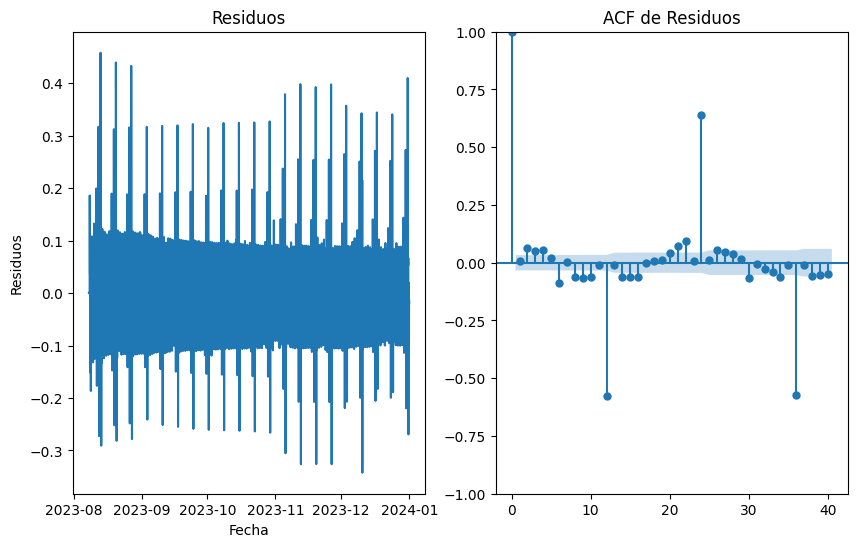

In [ ]:
# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(resultado.resid)
plt.title('Residuos')
plt.xlabel('Fecha')
plt.ylabel('Residuos')

# Graficar ACF de residuos
plt.subplot(1, 2, 2)
plot_acf(resultado.resid, lags=40, ax=plt.gca())
plt.title('ACF de Residuos')
plt.show()

# Realizar pronósticos
# Definir cuántos pasos hacia el futuro deseas predecir
n_steps = 3504
pronostico = model_fit.get_forecast(steps=n_steps)
intervalos_confianza = pronostico.conf_int()
predictions = pronostico.predicted_mean



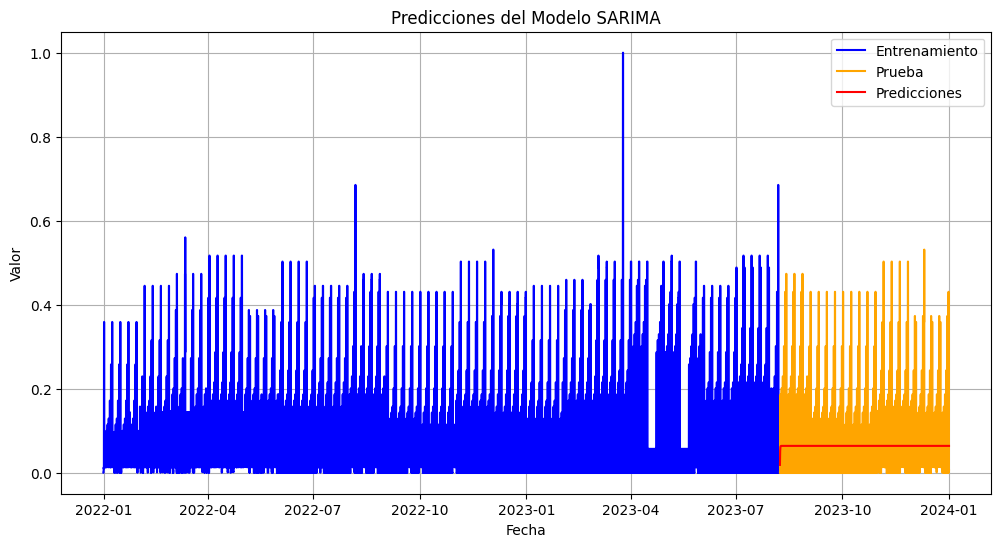

In [ ]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar los datos de entrenamiento
plt.plot(train.index, train, label='Entrenamiento', color='blue')

# Graficar los datos de prueba
plt.plot(test.index, test, label='Prueba', color='orange')

# Graficar las predicciones
pred_index = test.index
# Access the predicted mean values instead of the entire PredictionResultsWrapper
plt.plot(test.index, predictions, label='Predicciones', color='red')


# Añadir título y etiquetas
plt.title('Predicciones del Modelo SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular el error de la predicción
rmse = np.sqrt(np.mean((forecast - test) ** 2))
print(f'RMSE: {rmse}')

RMSE: nan


In [ ]:
# 7. Predicción futura
forecast = resultado.forecast(steps=3504) # Use 'resultado' instead of 'model_fit'
print('Predicciones futuras:', forecast)

Predicciones futuras: 2024-01-01 00:00:00    0.024115
2024-01-01 01:00:00    0.040198
2024-01-01 02:00:00    0.054223
2024-01-01 03:00:00   -0.042836
2024-01-01 04:00:00   -0.033786
                         ...   
2024-05-25 19:00:00    0.012737
2024-05-25 20:00:00    0.011876
2024-05-25 21:00:00    0.096474
2024-05-25 22:00:00    0.096659
2024-05-25 23:00:00    0.096690
Freq: 60T, Name: predicted_mean, Length: 3504, dtype: float64
